# Analisys of the results of Evolutionary simulations
The results of the Evolutionary simulations are subdivided into three documents that contain different scales of information of the populations:

## 1. Individual Information
Its contain the information of the 10% of the populations, some of this information are related to the genotype and phenotype of the individuals.

In [1]:
import matplotlib.pyplot as plt
from copy import copy
import numpy.matlib
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import numpy as np
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
import pandas as pd
files = "_u0.03_M1.1_st500_N1000_v0.3_alg0_1"
def data_conv(data):
    data=np.array(data)
    for i in range(len(data)):
        data[i]=np.array(np.mat(data[i]))[0][0].astype("float")
    return data

In [2]:
resultI = pd.read_csv("Result/Ind_inf"+files+".csv")

resultI

Unnamed: 0  Generation  Cell tag  \
0                0         0.0         0   
1                1         0.0        10   
2                2         0.0        20   
3                3         0.0        30   
4                4         0.0        40   
...            ...         ...       ...   
499995      499995      4999.0       950   
499996      499996      4999.0       960   
499997      499997      4999.0       970   
499998      499998      4999.0       980   
499999      499999      4999.0       990   

                                 Expresion and repression  \
0       [1.19, 1.2, 90, 1.6, 0.03, 0.226, 0.8, 1, 0.47...   
1       [1.11825323e+00 1.25530679e+00 8.28532782e+01 ...   
2       [1.19, 1.2, 90, 1.6, 0.03, 0.226, 0.8, 1, 0.47...   
3       [1.19, 1.2, 90, 1.6, 0.03, 0.226, 0.8, 1, 0.47...   
4       [1.19, 1.2, 90, 1.6, 0.03, 0.226, 0.8, 1, 0.47...   
...                                                   ...   
499995  [1.14030757e+00 1.33477678e+00 8.63037213e+01 ...   
499996  [1.18182131e+00 1.26846401e+00 8.78587197e+01 ...   
499997  [8.85681834e-01 1.42186424e+00 8.06127530e+01 ...   
499998  [1.32838987e+00 1.14448093e+00 8.83256404e+01 ...   
499999  [1.18182131e+00 1.26846401e+00 8.78587197e+01 ...   

        Constant of light rate  \
0                     0.200000   
1                     0.196127   
2                     0.200000   
3                     0.200000   
4                     0.200000   
...                        ...   
499995                0.205118   
499996                0.205118   
499997                0.209597   
499998                0.172569   
499999                0.205118   

                                    Disociation Constants  \
0                    [0.03, 1, 0.475, 5, 0.1, 0.18, 0.02]   
1       [0.03165778 1.06802695 0.475      5.50244442 0...   
2                    [0.03, 1, 0.475, 5, 0.1, 0.18, 0.02]   
3                    [0.03, 1, 0.475, 5, 0.1, 0.18, 0.02]   
4                    [0.03, 1, 0.475, 5, 0.1, 0.18, 0.02]   
...                                                   ...   
499995  [0.03007779 1.0357883  0.36158399 5.4693477  0...   
499996  [0.03007779 1.0357883  0.36158399 5.4693477  0...   
499997  [0.02862745 1.15885426 0.41183772 5.39258641 0...   
499998  [0.02461128 0.89949561 0.45734644 4.70902896 0...   
499999  [0.02728854 1.01654481 0.3926211  5.01358165 0...   

                                       Hill exponents   Fitness  \
0                                        [4, 4, 4, 4]  0.036573   
1       [4.         3.24596497 3.88896752 4.0564572 ]  0.047640   
2                                        [4, 4, 4, 4]  0.036573   
3                                        [4, 4, 4, 4]  0.036573   
4                                        [4, 4, 4, 4]  0.036573   
...                                               ...       ...   
499995  [4.05952879 2.8941146  3.23060386 4.43207342]  0.853741   
499996  [4.05952879 2.8941146  3.23060386 4.43207342]  0.955944   
499997  [4.14554744 2.85339283 2.93722874 3.30914694]  1.000000   
499998  [5.20633532 4.96745881 4.8249358  3.80917653]  0.106599   
499999  [3.9170809  2.92276433 4.10148987 4.06882775]  1.000000   

                                             WCCn  \
0            [0.1235 0.1817 0.238  0.2946 0.3556]   
1            [0.1235 0.2875 0.5522 1.3229 1.4179]   
2            [0.1235 0.1817 0.238  0.2946 0.3556]   
3            [0.1235 0.1817 0.238  0.2946 0.3556]   
4            [0.1235 0.1817 0.238  0.2946 0.3556]   
...                                           ...   
499995       [1.8316 1.8259 1.8205 1.8153 1.8101]   
499996       [2.0175 2.005  1.9928 1.9813 1.9698]   
499997       [5.4595 5.4595 5.4594 5.4594 5.4594]   
499998  [10.2452 10.2409 10.2367 10.2326 10.2286]   
499999       [3.045  3.0481 3.0512 3.0541 3.057 ]   

                                                     Time  Parent tag  
0                              [0.   0.5  1.   1.5  2.02]           0  
1                 

In [3]:
rW = np.array(resultI["WCCn"])
rT = np.array(resultI["Time"])
count=[]
for i in range(len(rW)):
    try:
        rW[i]=list(np.array(np.mat(rW[i]))[0])
        rT[i]=list(np.array(np.mat(rT[i]))[0])
    except:
        count.append(i)
        print(i)

- Graphics the fitness as points through generations and as an histogram.

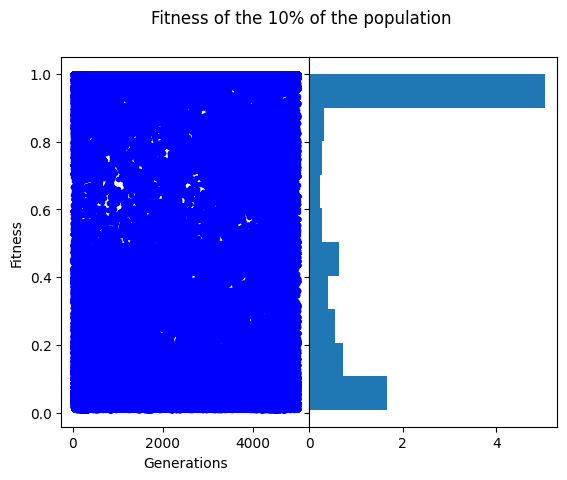

In [4]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].plot(resultI["Generation"],resultI["Fitness"],".b")
ax[0].set_xlabel("Generations")
ax[0].set_ylabel("Fitness")
fig.suptitle("Fitness of the 10% of the population")
ax[1].hist(resultI["Fitness"],orientation="horizontal",density=True)
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Fitness_Ind"+files+".jpg")
plt.show()

- Graphics the concentration of WCC protein divided into 10 at differents forms, firsts graphics are the polyfit data and its standar deviation error, the lasts graphics are the raw data, both kind of graphics change its color each two oscillation cycles.

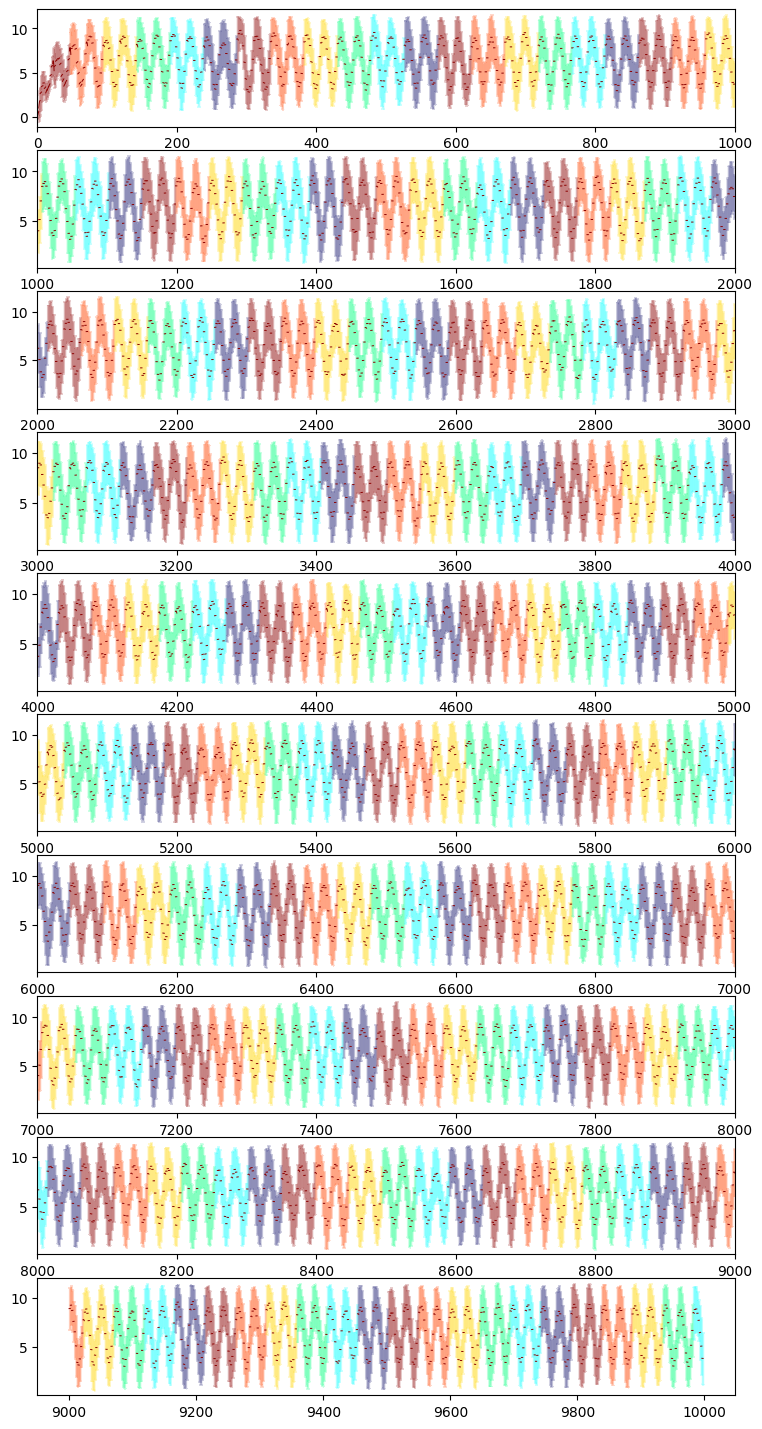

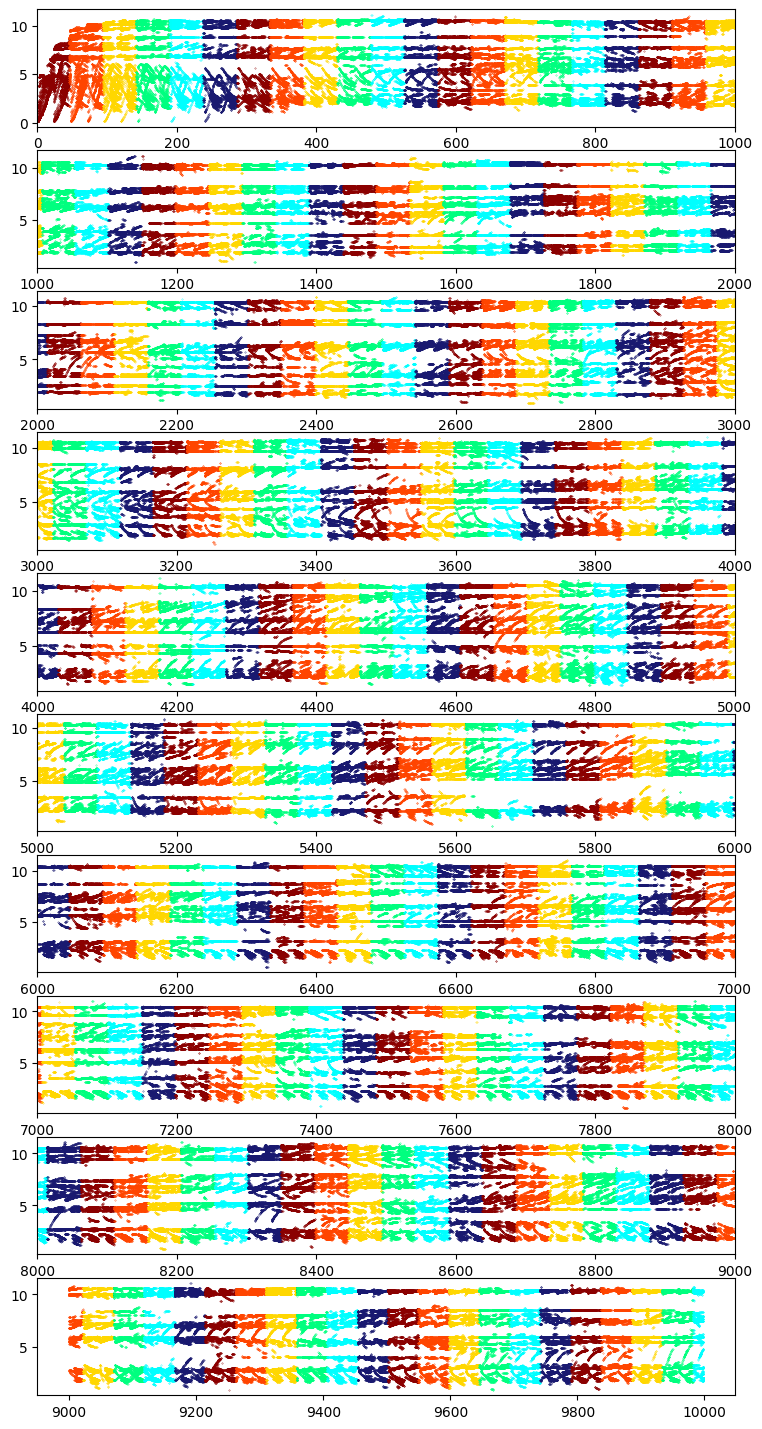

In [5]:
color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
fig1, ax1 = plt.subplots(10,figsize=(9,18))
fig2, ax2 = plt.subplots(10,figsize=(9,18))
count=500
for i in range(1,int(resultI["Generation"].max())+1):
    x,y = list(rT[(i-1)*100:i*100]),list(rW[(i-1)*100:i*100])
    x,y = np.array(x).reshape(500),np.array(y).reshape(500)
    # fit a linear curve and estimate its y-values and their error.
    a,b,c = np.polyfit(x, y, deg=2)
    y_est = a*x**2 + b*x + c
    y_err = np.sqrt(np.sum((y - y_est)**2)/len(y))
    
    ax1[(i-1)//500].plot(pd.unique(x), pd.unique(y_est), '-',color="darkred",
                         linewidth=0.7)#markersize=.5)
    ax1[(i-1)//500].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color=color[i//24%6])
    
    
    
    
    ax2[(i-1)//500].plot(x, y, '.', color=color[i//24%6],markersize=.5)
    
    if count==i:
        ax1[(i-1)//500].set_xlim((i-500)*2,i*2)
        #ax1[(i-1)//500].set_ylim([0,20])
        ax2[(i-1)//500].set_xlim((i-500)*2,i*2)
        #ax2[(i-1)//500].set_ylim([0,20])
        count += 500
    
plt.show()


- Graphic to a better visualizate of the raw data at certain time span.

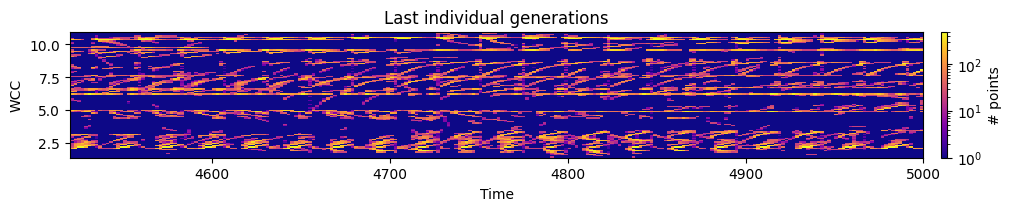

In [6]:
fig, axes = plt.subplots(1, figsize=(10, 2), layout='constrained')
start=int(resultI["Generation"].max()-479)
time = 480
num_fine = time*10
arr = 20
x_fine = list(np.linspace(start, start+time, num_fine).reshape(num_fine//arr,arr))
y_fine = np.empty((time*50, 20), dtype=float)
for i in range(time*50):
    y_fine[i, :] = np.interp(x_fine[i//100], rT[start*50+i], rW[start*50+i])
y_fine = y_fine.flatten()
for i in range(num_fine//arr):
    x_fine[i] = np.matlib.repmat(x_fine[i], 100, 1).flatten()
x_fine = np.array(x_fine).flatten()


# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[240, 100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=5e2), rasterized=True)
axes.set_xlabel("Time")
axes.set_ylabel("WCC")
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("Last individual generations")

plt.savefig("Result/Last individual generations"+files+".jpg")
plt.show()

- Correlation and autocorrelation of the WCC protein concentrations.

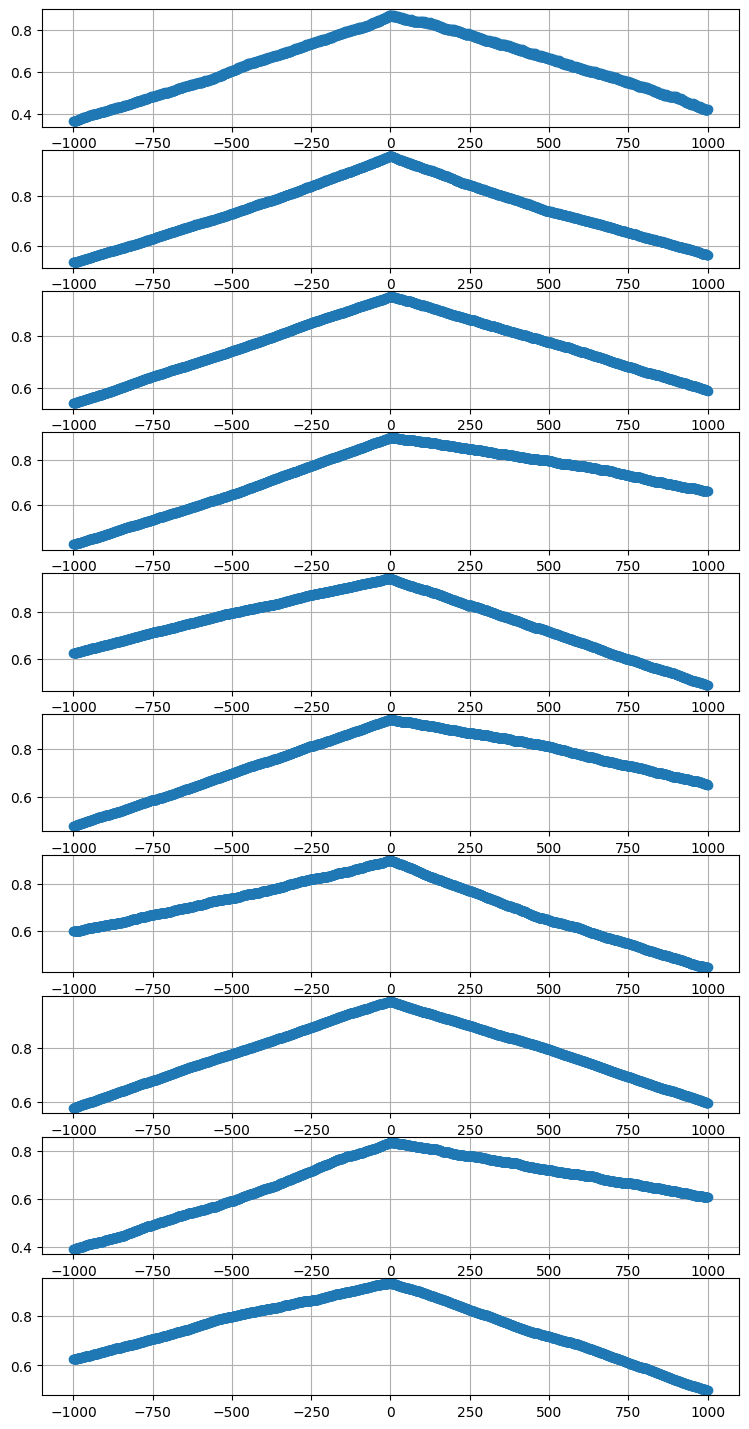

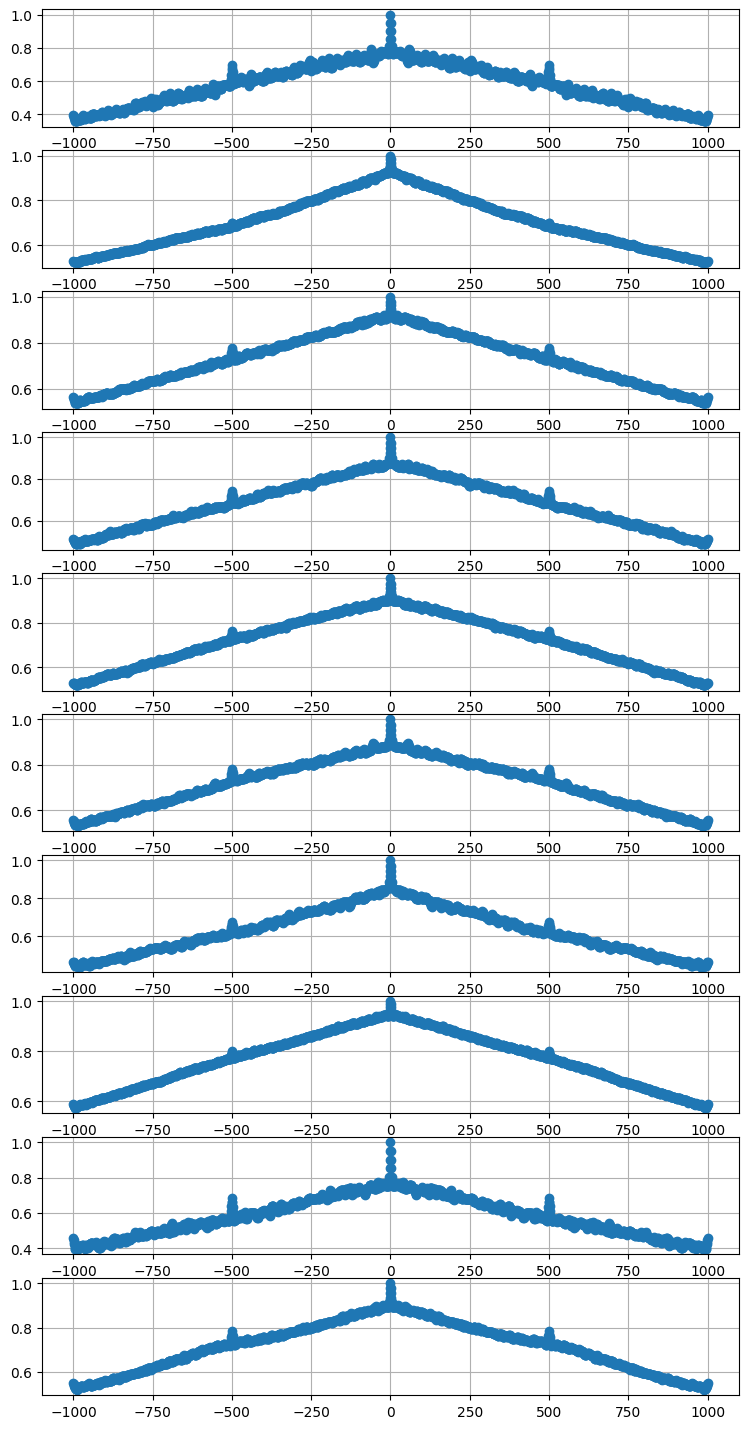

In [7]:
color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
fig1, ax1 = plt.subplots(10,figsize=(9,18))
fig2, ax2 = plt.subplots(10,figsize=(9,18))
n = int(resultI["Generation"].max()/10)
for i in range(10):
    x,y = list(rT[i*n:(i+1)*n]),list(rW[i*n:(i+1)*n])
    x,y = np.array(x).reshape(n*5),np.array(y).reshape(n*5)
        
    ax1[i].xcorr(x, y, usevlines=False, maxlags=1000, normed=True)
    ax1[i].grid(True)

    ax2[i].acorr(y, usevlines=False, maxlags=1000, normed=True)
    ax2[i].grid(True)
    
plt.show()

- Graphics of the genotype parameters.

In [9]:
a=len(resultI["Expresion and repression"])
ERkI = [[0]*23]*a
for i in range(a):
    ERkI[i] = np.array(np.mat(resultI["Expresion and repression"][i]))[0]
ERkI = np.array(ERkI)
    
DkmI = [[0]*7]*a
for i in range(a):
    DkmI[i] = np.array(np.mat(resultI["Disociation Constants"][i]))[0]
DkmI = np.array(DkmI)

nHI = [[0]*4]*a
for i in range(a):
    nHI[i] = np.array(np.mat(resultI["Hill exponents"][i]))[0]
nHI = np.array(nHI)

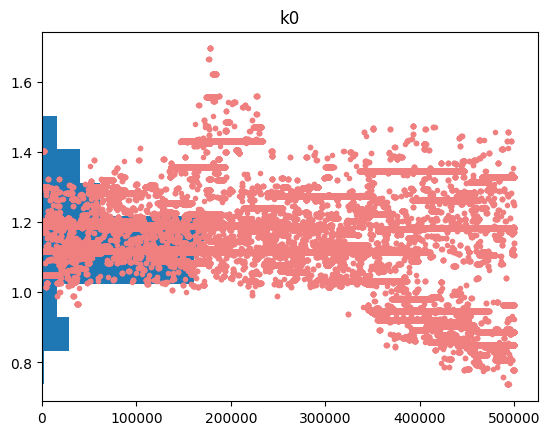

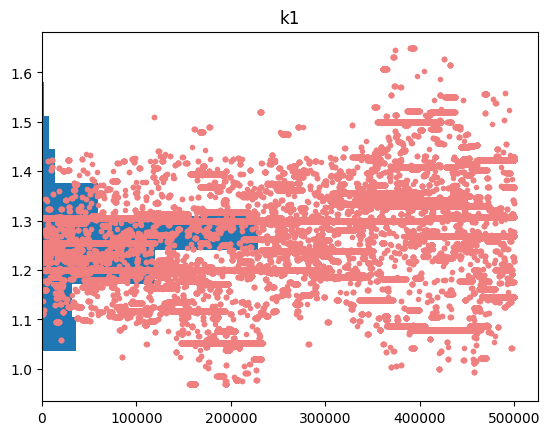

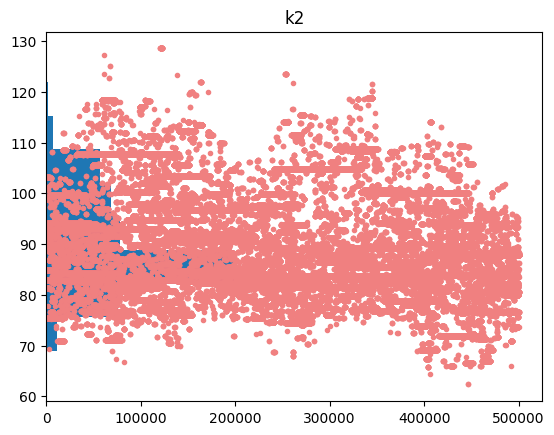

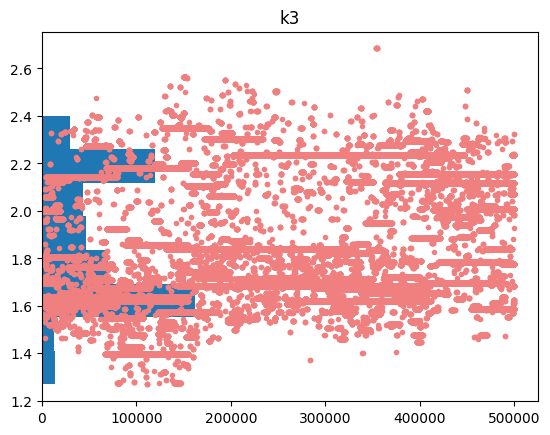

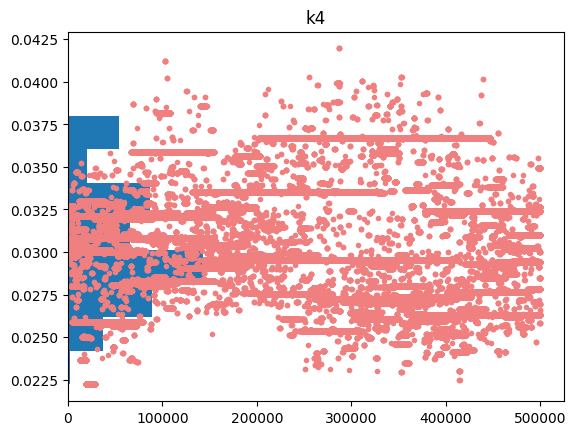

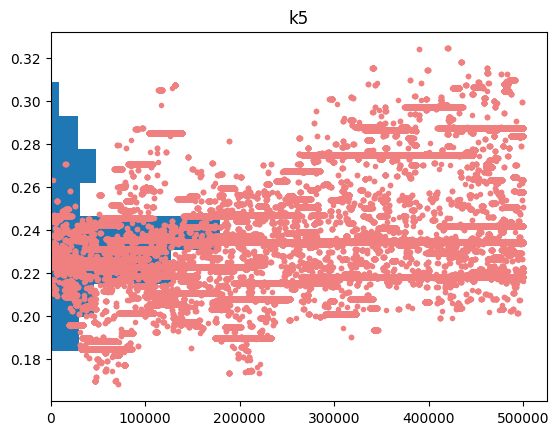

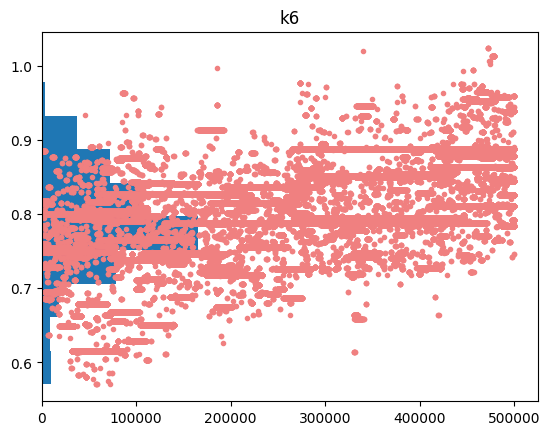

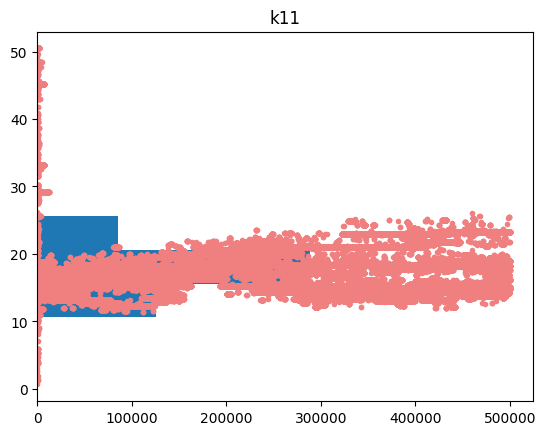

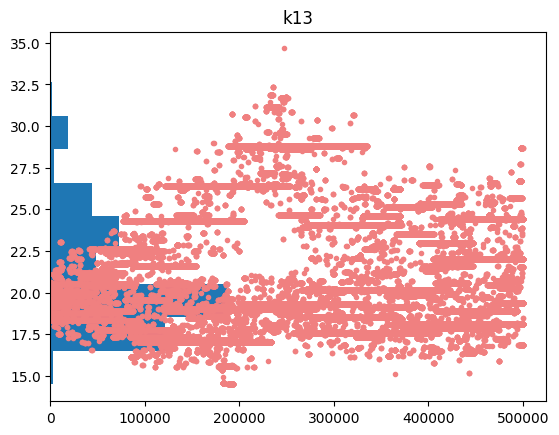

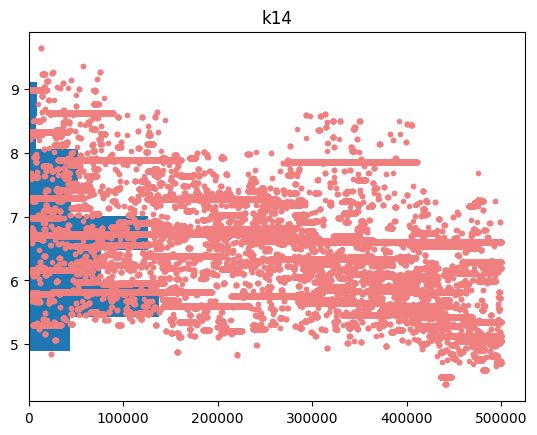

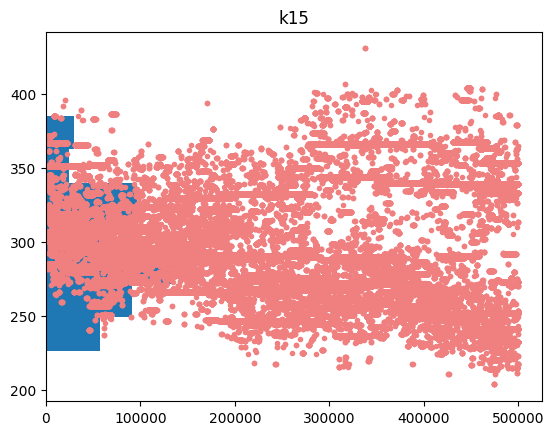

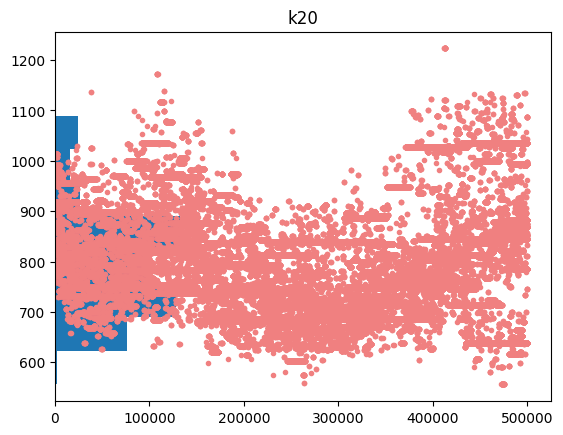

In [10]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERkI[:,i],'.',color="lightcoral")
        plt.hist(ERkI[:,i],orientation="horizontal")
        plt.title("k{}".format(i))
        plt.savefig("Result/k{}_Ind{}.jpg".format(i,files))
        plt.show()

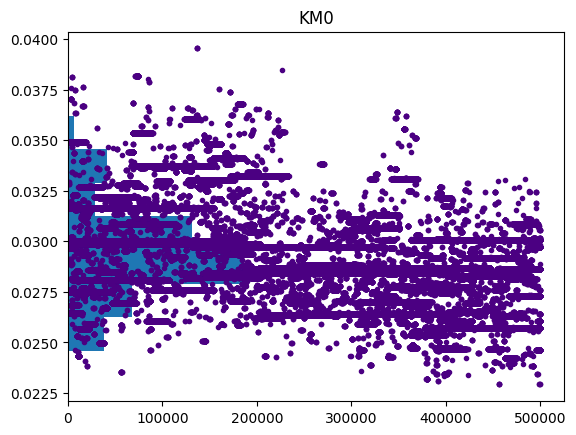

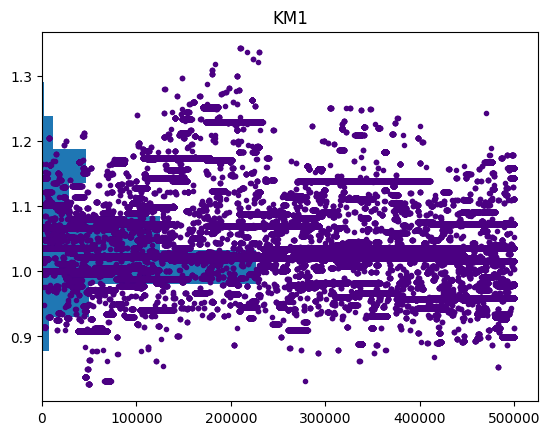

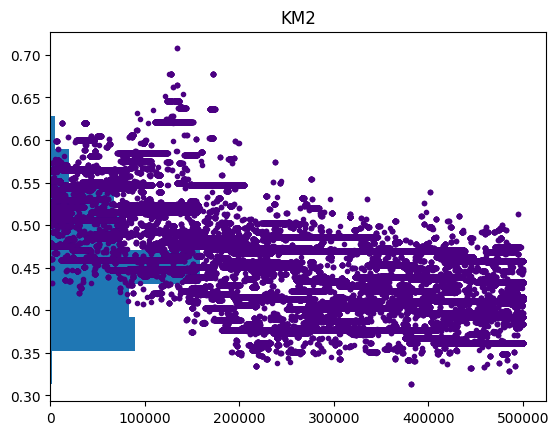

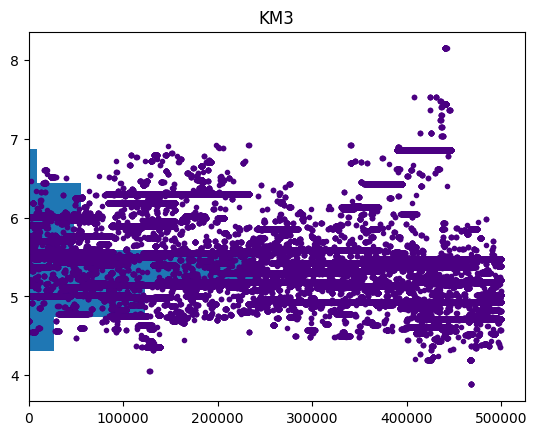

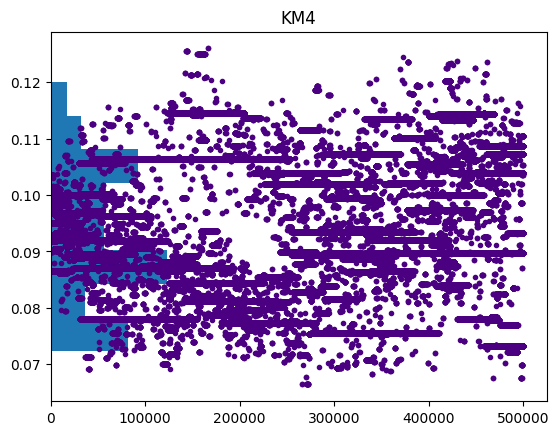

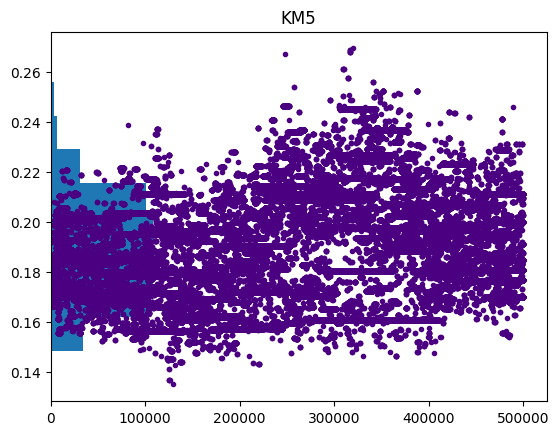

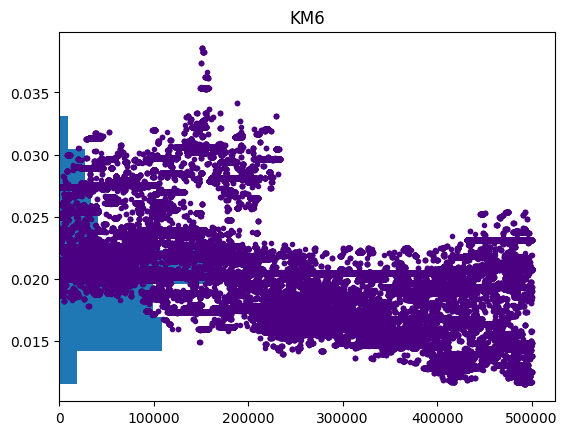

In [11]:
for i in range(0,7):
    plt.plot(DkmI[:,i],'.',color="indigo")
    plt.hist(DkmI[:,i],orientation="horizontal")
    plt.title("KM{}".format(i))
    plt.savefig("Result/KM{}_Ind{}.jpg".format(i,files))
    plt.show()

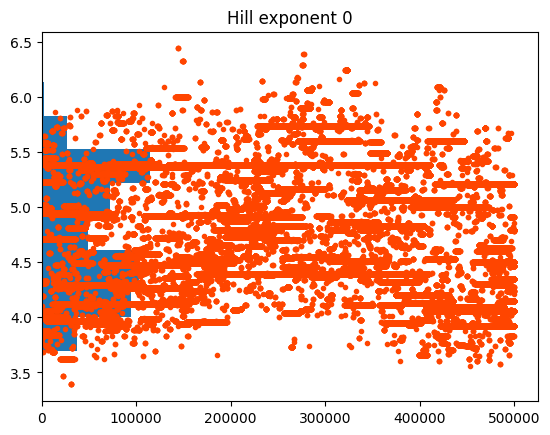

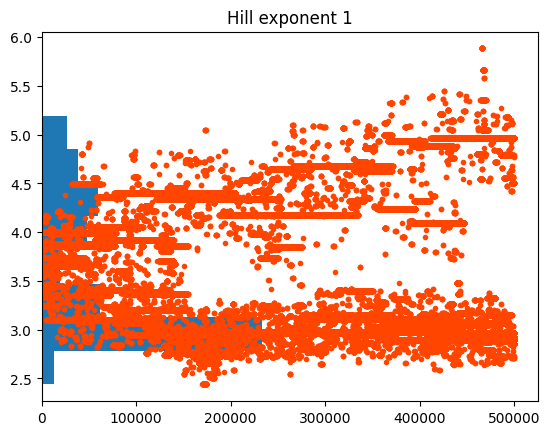

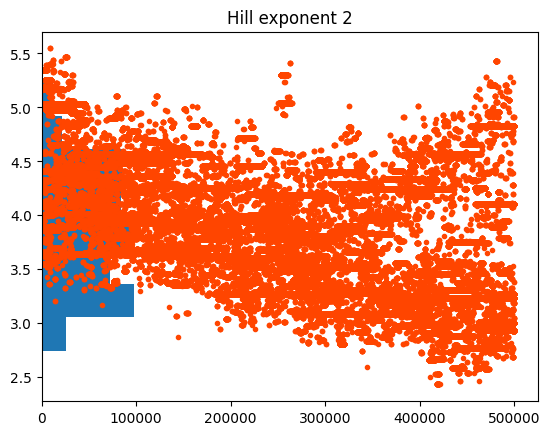

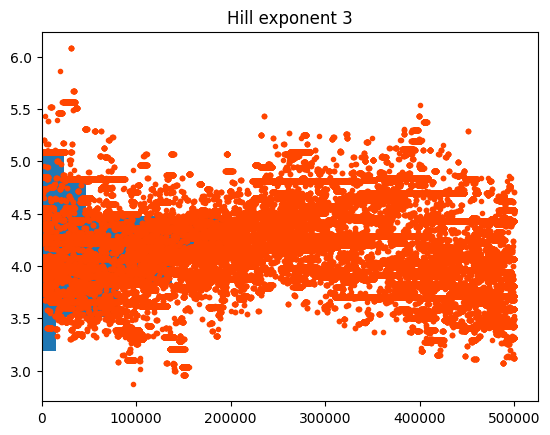

In [12]:
for i in range(0,4):
    plt.plot(nHI[:,i],'.',color="orangered")
    plt.hist(nHI[:,i],orientation="horizontal")
    plt.title("Hill exponent {}".format(i))
    plt.savefig("Result/Hill_exp{}_Ind{}.jpg".format(i,files))
    plt.show()

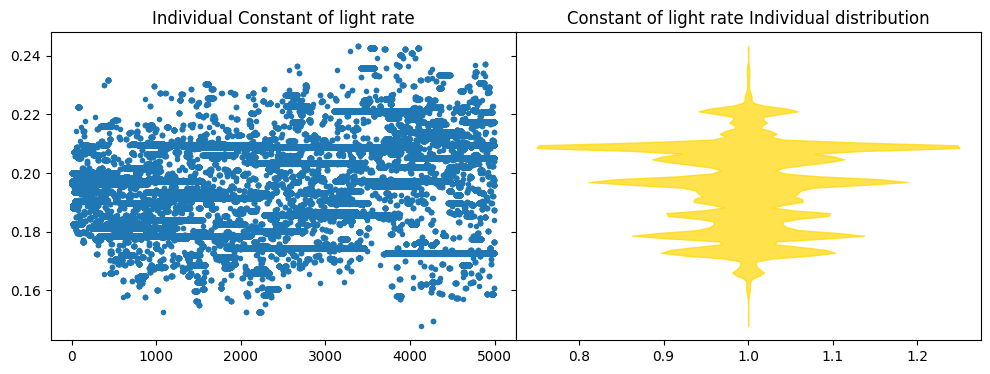

In [13]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultI["Generation"],resultI["Constant of light rate"],".")
ax[0].set_title("Individual Constant of light rate")
vp=ax[1].violinplot(resultI["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Individual distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Light_Ind"+files+".jpg")
plt.show()

## 2. Average Generation Information
Its contain the average information of the populations at each generation.

In [14]:
resultA = pd.read_csv("Result/AveGenSub"+files+".csv")

resultA

Unnamed: 0  Generation  \
0              0         1.0   
1              1         2.0   
2              2         3.0   
3              3         4.0   
4              4         5.0   
...          ...         ...   
4995        4995      4996.0   
4996        4996      4997.0   
4997        4997      4998.0   
4998        4998      4999.0   
4999        4999      5000.0   

                     Expresion and repression constants  \
0     [1.18142982e+00 1.20660642e+00 8.92508182e+01 ...   
1     [1.15721900e+00 1.21865353e+00 8.67751962e+01 ...   
2     [1.12915195e+00 1.22640531e+00 8.38564145e+01 ...   
3     [1.10680096e+00 1.23267064e+00 8.15259882e+01 ...   
4     [1.09121866e+00 1.23756551e+00 7.99011173e+01 ...   
...                                                 ...   
4995  [1.08652846e+00 1.25779660e+00 8.29382895e+01 ...   
4996  [1.06001529e+00 1.28800267e+00 8.30441988e+01 ...   
4997  [1.09415095e+00 1.28301149e+00 8.45042544e+01 ...   
4998  [1.11876548e+00 1.27994703e+00 8.55062913e+01 ...   
4999  [1.14066245e+00 1.27584562e+00 8.63532541e+01 ...   

      Constant of light rate  \
0                   0.199815   
1                   0.198934   
2                   0.198218   
3                   0.197635   
4                   0.197167   
...                      ...   
4995                0.194823   
4996                0.199227   
4997                0.201335   
4998                0.202660   
4999                0.203547   

                                  Disociation constants  \
0     [0.03018241 1.00107736 0.475      5.02264439 0...   
1     [0.03087693 1.0147078  0.47829338 5.17908271 0...   
2     [0.03191274 1.02819979 0.49287588 5.36446408 0...   
3     [0.03273624 1.03928381 0.50340446 5.51139076 0...   
4     [0.03327096 1.04766017 0.50986068 5.61360058 0...   
...                                                 ...   
4995  [0.02754674 1.01374087 0.43765597 4.8547431  0...   
4996  [0.02799644 1.0289847  0.42525957 4.92187827 0...   
4997  [0.02837971 1.02721439 0.40850325 5.04231646 0...   
4998  [0.02889888 1.03007542 0.3936167  5.17390427 0...   
4999  [0.02922802 1.02877277 0.38271463 5.26906592 0...   

                                     Hill exponents       WCC   Fitness  
0     [4.         3.91464925 3.9668408  4.00268356]  0.285632  0.032551  
1     [3.99398505 3.77977816 3.9366129  4.01550865]  1.120416  0.074412  
2     [3.96730878 3.72473135 3.92289142 4.0260267 ]  2.305217  0.362517  
3     [3.95025909 3.67701066 3.91013438 4.03480929]  3.139034  0.677669  
4     [3.93992185 3.63366422 3.90399472 4.04153556]  3.632138  0.931984  
...                                             ...       ...       ...  
4995  [4.81532128 3.86170323 3.83782991 3.67752352]  8.325680  0.606981  
4996  [4.6235727  3.54912603 3.6264455  3.72221431]  7.168436  0.439159  
4997  [4.43153712 3.3218305  3.5829762  3.91508728]  5.699100  0.402201  
4998  [4.30446509 3.17451174 3.47222783 4.07651581]  4.531881  0.584382  
4999  [4.20265614 3.06701907 3.41659787 4.20286955]  3.622178  0.834184  

[5000 rows x 8 columns]

- Fitness and WCC protein concentration through each generation, and last is the comparation of the both.

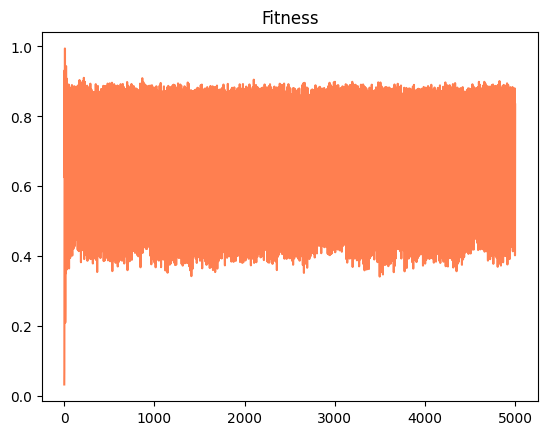

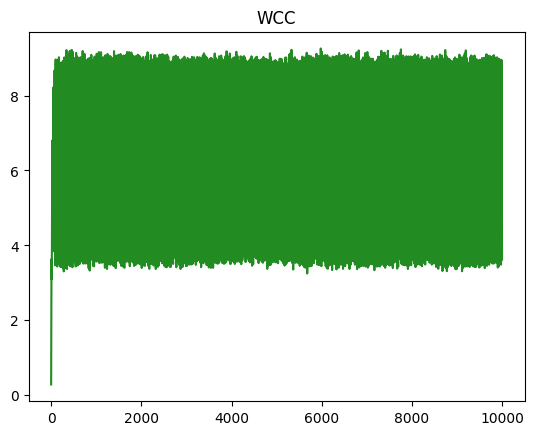

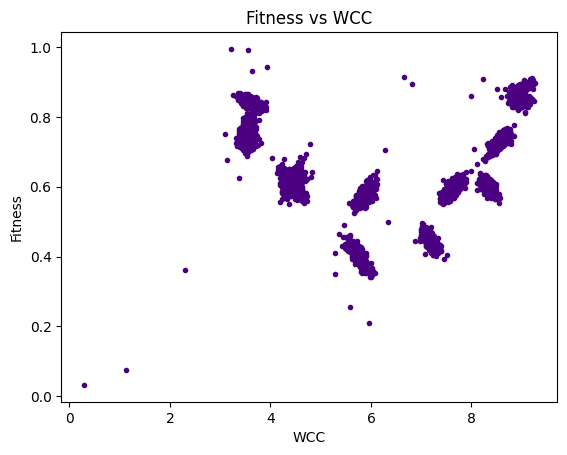

In [15]:
plt.figure()
plt.plot(resultA["Generation"],resultA["Fitness"],'-',color='coral')
#plt.vlines(range(0,len(resultA["Fitness"]),24),0,max(resultA["Fitness"]))
plt.title("Fitness")
plt.savefig("Result/Fitness_Ave"+files+".jpg")
plt.show()

plt.figure()
plt.plot(range(0,len(resultA["WCC"])*2,2),resultA["WCC"],'-',color='forestgreen')
#plt.vlines(range(0,len(resultA["WCC"])*2,48),0,max(resultA["WCC"]))
plt.title("WCC")
#plt.ylim([0,12])
plt.savefig("Result/WCC_Ave"+files+".jpg")
plt.show()

plt.figure()
plt.plot(resultA["WCC"],resultA["Fitness"],'.',color='indigo')
plt.title("Fitness vs WCC")
#plt.xlim([0,12])
plt.xlabel("WCC")
plt.ylabel("Fitness")
plt.savefig("Result/WCC vs Fitness"+files+".jpg")
plt.show()

In [16]:
def ODE(tm,y):
    def f_m(P_1,P_2,K_m):
        return (P_1 + P_2 + K_m -  np.sqrt(pow(float(P_1 + P_2 + K_m),2) - 4*P_1*P_2))/2
            
    wc1 = y[0]
    wc2 = y[1]
    WC1 = y[2]
    WC2 = y[3]
    WCCc = y[4]
    WCCn = y[5]
    laWCC = y[6]
    frq = y[7]
    FRQ = y[8]
    FFC = y[9]
    FFCp = y[10]
    FFCn = y[11]
    vvd = y[12]
    VVDc = y[13]
    VVDn = y[14]
    
    k=[1.19,1.2,90,1.6,0.03,0.226,0.8,1,0.472,0.3,0.001,0.6,0.001,20,7.3,320,0.19,0.15,0.1,0.1,800,0.68,0.3]
    L=0.2
    n=[4,4,4,4]
    K=[0.03,1,0.475,5,0.1,0.18,0.02]
    kd=[2.4,2.5,0.135,0.085,0.05,0.05,6,2,0.27,0.27,0.27,0.27,6.2,0.24,0.24]
    
    #Tiempo y periodos LD
    m=tm%24
    if m>=12:
        l = 0
    else:
        l = L

    #Ecuaciones        
    dwc1 = k[0] + k[1]*WCCn + k[2]*laWCC - kd[0]*wc1
    dwc2 = k[3]/(1 + K[0]*WCCn) + k[4]*FFCn - kd[1]*wc2
    dWC1 = k[5]*wc1 + k[6]*f_m(wc1,FFCp,K[1]) - k[8]*WC1*WC2 - kd[2]*WC1
    dWC2 = k[7]*wc2 - kd[3]*WC2 - k[8]*WC1*WC2
    dWCCc = k[8]*WC1*WC2 - kd[4]*WCCc -  k[9]*WCCc
    dWCCn = k[9]*WCCc + k[10]*laWCC - kd[5]*WCCn - l*WCCn - k[12]*WCCn - k[11]*WCCn*(pow(FFCn,n[0])/(pow(K[2],n[0]) + pow(FFCn,n[0])))
    dlaWCC = L*WCCn + k[12]*WCCn - kd[6]*laWCC - k[10]*laWCC - k[13]*laWCC*(pow(VVDn,n[1])/(pow(K[3],n[1]) + pow(VVDn,n[1])))
    dfrq =  (k[14]*pow(float(K[5]*WCCn),n[2]) + k[15]*pow(float(K[4]*laWCC),n[2]))/(pow(float(K[4]*K[5]),n[2]) + pow(float(K[5]*WCCn),n[2]) + pow(float(K[4]*laWCC),n[2])) - kd[7]*frq
    dFRQ =  k[16]*frq - kd[8]*FRQ - k[17]*FRQ
    dFFC = k[17]*FRQ - kd[9]*FFC - k[18]*FFC
    dFFCp = k[18]*FFC - kd[10]*FFCp - k[19]*FFCp
    dFFCn = k[19]*FFCp - kd[11]*FFCn
    dvvd = (k[20]*pow(laWCC,n[3]))/(pow(K[6],n[3]) + pow(laWCC,n[3])) - kd[12]*vvd
    dVVDc = k[21]*vvd - kd[13]*VVDc -  k[22]*VVDc
    dVVDn = k[22]*VVDc - kd[14]*VVDn
    return [dwc1, dwc2, dWC1, dWC2, dWCCc, dWCCn, dlaWCC, dfrq, dFRQ, dFFC, dFFCp, dFFCn, dvvd, dVVDc, dVVDn]

- Comparation of the fitness, WCC concentration, optimal concentration of WCC and Tseng model parameters.

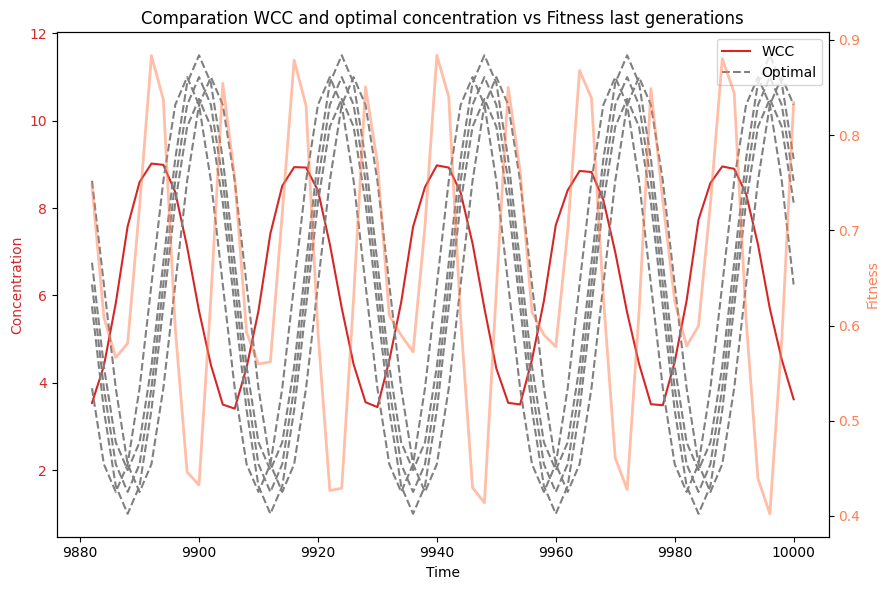

In [17]:
fig, ax1 = plt.subplots(figsize=(9,6))
time=resultA["Generation"][-60::]*2
amp = (11-1.5)/2
yd = 1.5 + amp
WCCopt = np.array([yd + amp*(np.cos(2*np.pi*(time+12)/24)),
                 yd + amp*(np.cos(2*np.pi*(time+10)/24)),
                 yd + amp*(np.cos(2*np.pi*(time+14)/24)),
                 yd + amp*(np.cos(2*np.pi*(time+12)/24))-0.5,
                 yd + amp*(np.cos(2*np.pi*(time+12)/24))+0.5])

color = 'tab:red'
#sol = solve_ivp(ODE,[9000,10000],np.ones(15))
#ax1.plot(sol.t,sol.y[5],color="green")
#ax1.set_xlim([9750,10000])
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration', color=color)
ax1.plot(time,resultA["WCC"][-60::],"-",color=color)
ax1.plot(time,WCCopt.T,"--",color="grey")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["WCC","Optimal"],loc="upper right")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'coral'
ax2.set_ylabel('Fitness', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data_conv(resultA["Fitness"][-60::]).astype("float"), color=color,alpha=0.5,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Comparation WCC and optimal concentration vs Fitness last generations")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Result/WCC and optimal concentration vs Fitness"+files+'.jpg')
plt.show()

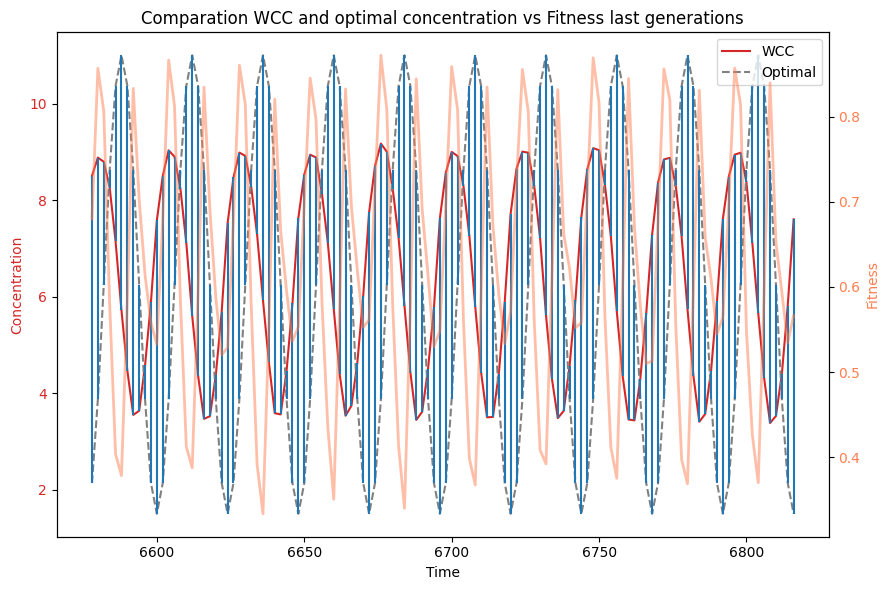

In [38]:
fig, ax1 = plt.subplots(figsize=(9,6))
time=resultA["Generation"][-120::]*2
amp = (11-1.5)/2
yd = 1.5 + amp
WCCopt = yd + amp*(np.cos(2*np.pi*(time+12)/24))

color = 'tab:red'
#sol = solve_ivp(ODE,[9000,10000],np.ones(15))
#ax1.plot(sol.t,sol.y[5],color="green")
#ax1.set_xlim([9750,10000])
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration', color=color)
ax1.plot(time,resultA["WCC"][-120::],"-",color=color)
ax1.plot(time,WCCopt,"--",color="grey")
ax1.vlines(time,WCCopt,resultA["WCC"][-120::])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["WCC","Optimal"],loc="upper right")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'coral'
ax2.set_ylabel('Fitness', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data_conv(resultA["Fitness"][-120::]).astype("float"), color=color,alpha=0.5,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Comparation WCC and optimal concentration vs Fitness last generations")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("Result/WCC and optimal concentration vs Fitness"+files+'.jpg')
plt.show()

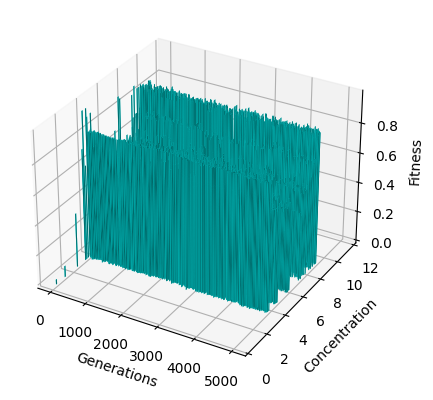

In [18]:
ax = plt.figure().add_subplot(projection='3d')
ax.bar3d(resultA["Generation"], resultA["WCC"],
         np.zeros_like(resultA["Fitness"]), 
         1, .1, resultA["Fitness"], shade = True, color="cyan")
ax.set_ylim([0,12])
ax.set_xlabel("Generations")
ax.set_ylabel("Concentration")
ax.set_zlabel("Fitness")
plt.show()

- Graphics of the genotype parameters.

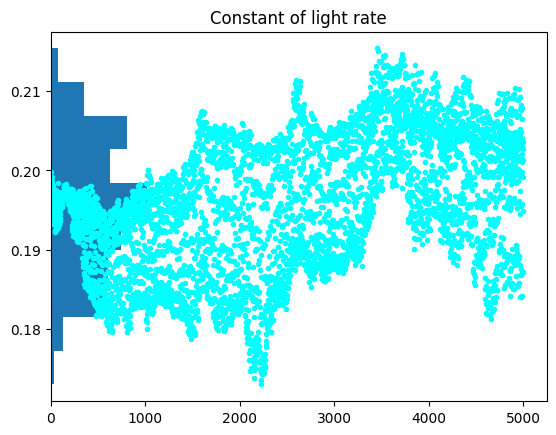

In [19]:
plt.plot(resultA["Generation"],resultA["Constant of light rate"],".",color='cyan')
plt.hist(resultA["Constant of light rate"],orientation="horizontal")
plt.title("Constant of light rate")
plt.savefig("Result/Light_Ave"+files+".jpg")
plt.show()

In [20]:
ERk = [[0]*23]
for k in resultA["Expresion and repression constants"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)
ERk = ERk[1:,:]

Dkm = [[0]*7]
for km in resultA["Disociation constants"]:
    Dkm = np.append(Dkm,np.array(np.mat(km)),axis=0)
Dkm = Dkm[1:,:]

nH = [[0]*4]
for n in resultA["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

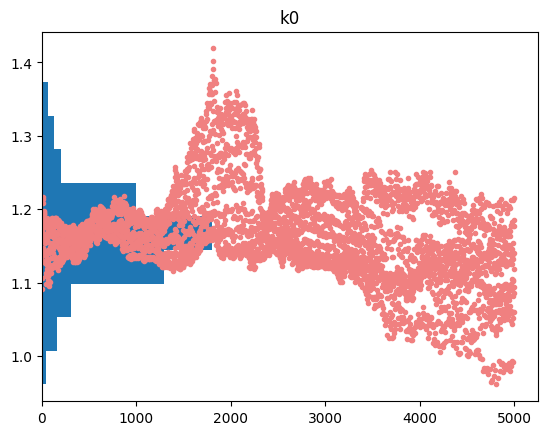

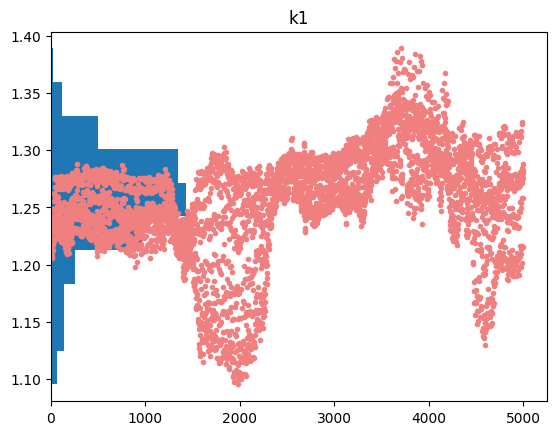

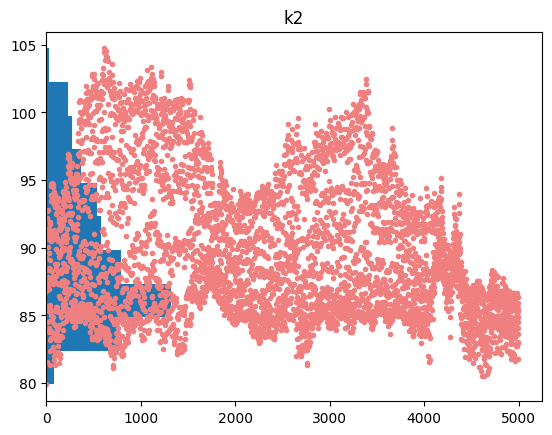

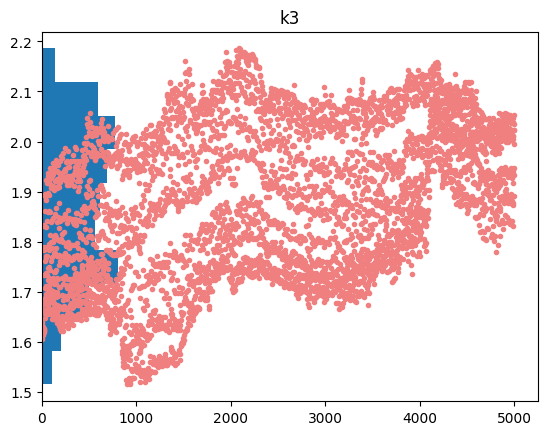

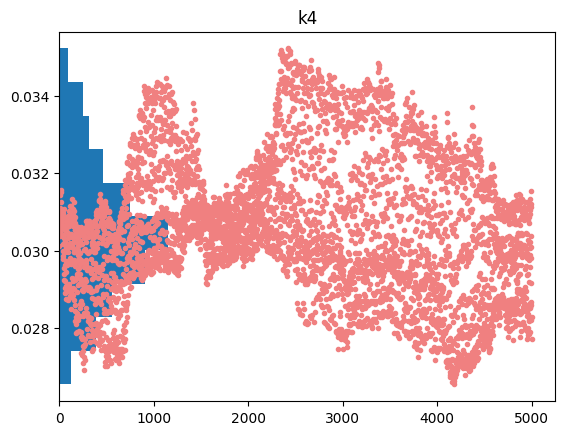

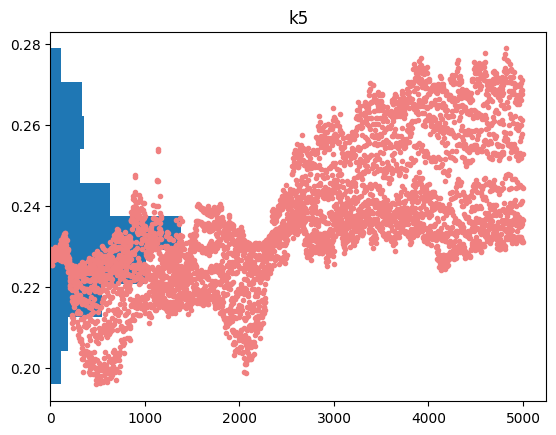

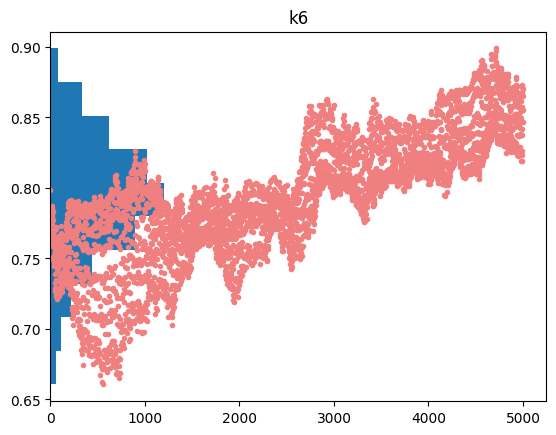

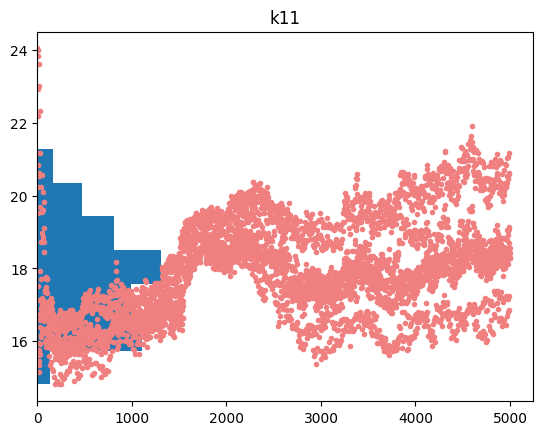

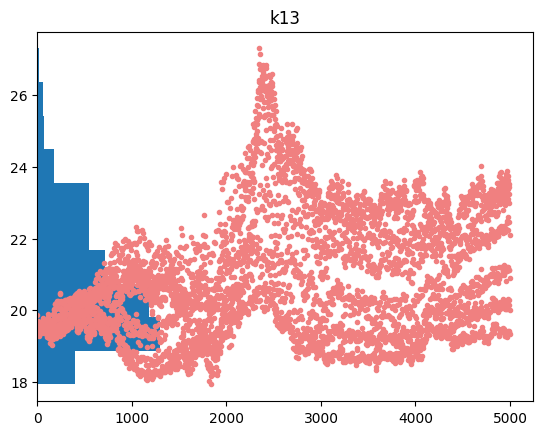

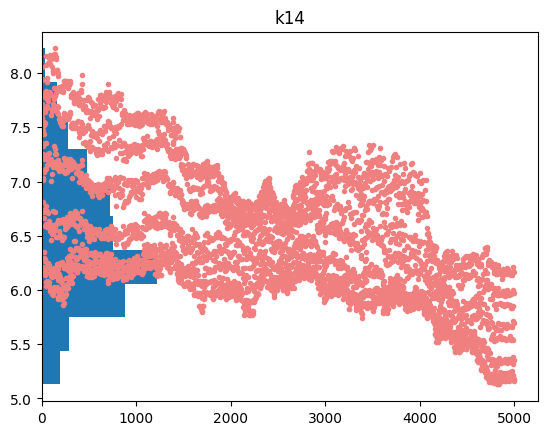

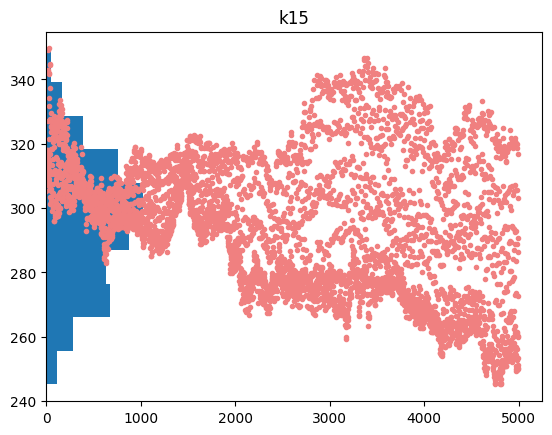

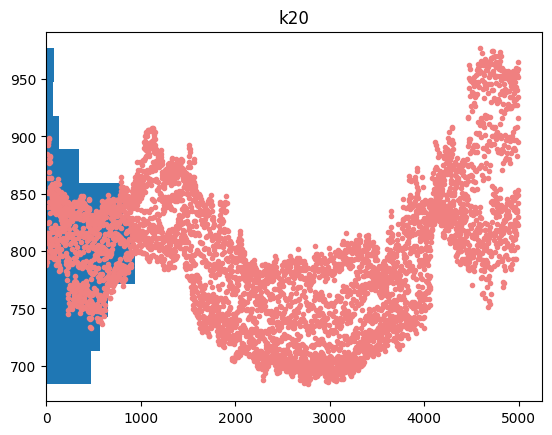

In [21]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERk[:,i],'.',color="lightcoral")
        plt.hist(ERk[:,i],orientation="horizontal")
        plt.title("k{}".format(i))
        plt.savefig("Result/k{}_Ave{}.jpg".format(i,files))
        plt.show()

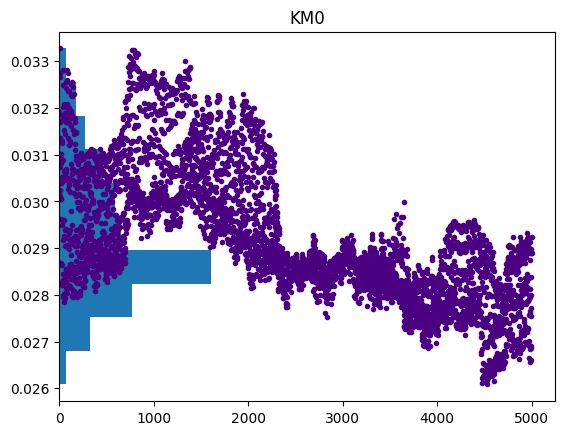

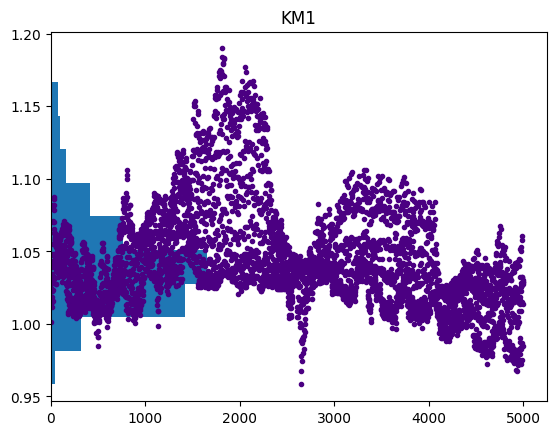

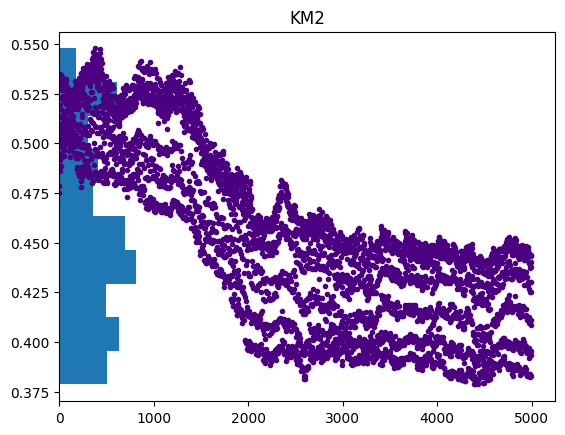

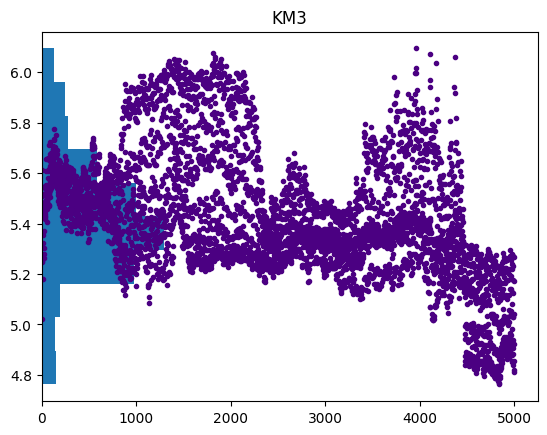

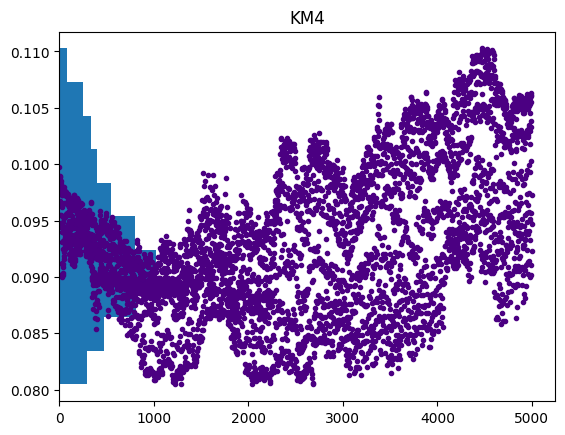

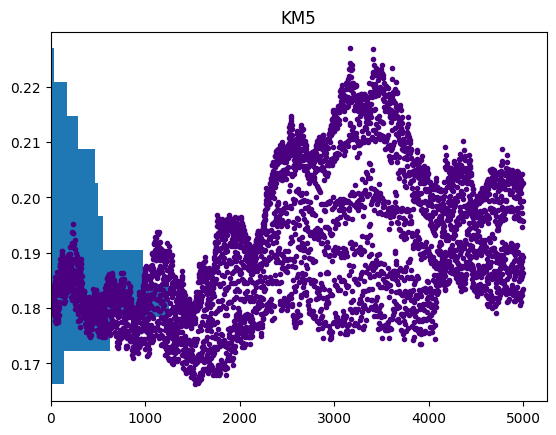

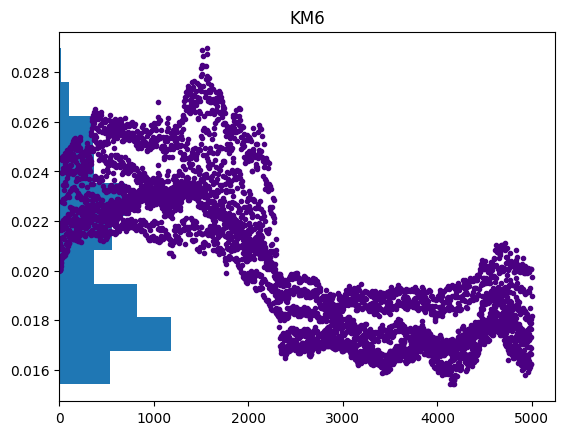

In [22]:
for i in range(0,7):
    plt.plot(Dkm[:,i],'.',color="indigo")
    plt.hist(Dkm[:,i],orientation="horizontal")
    plt.title("KM{}".format(i))
    plt.savefig("Result/KM{}_Ave{}.jpg".format(i,files))
    plt.show()

In [23]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(resultA[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

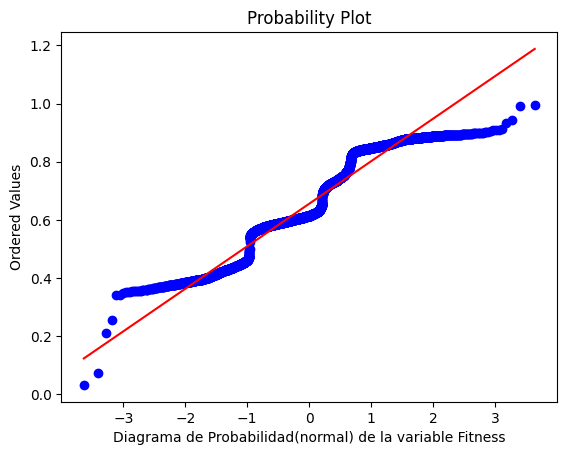

In [24]:
normalidad_variable_numerica("Fitness")

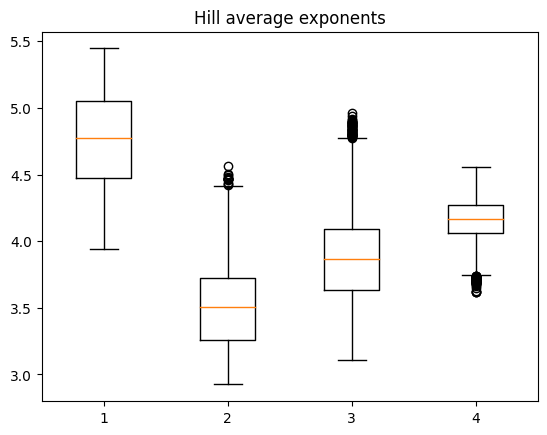

In [25]:
plt.boxplot(nH)
plt.title("Hill average exponents")
plt.savefig("Result/Hill_exp_Ave"+files+".jpg")
plt.show()

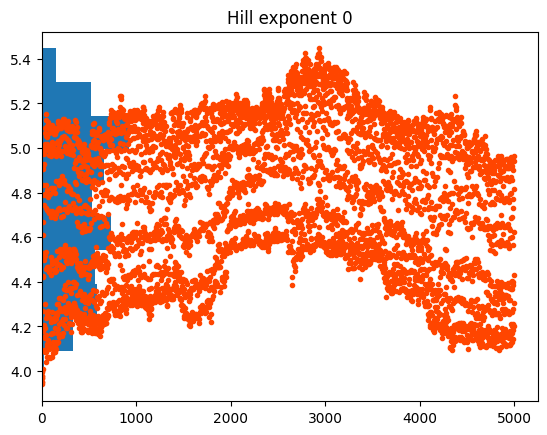

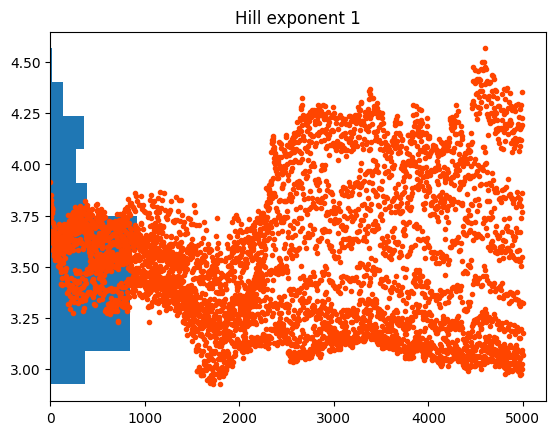

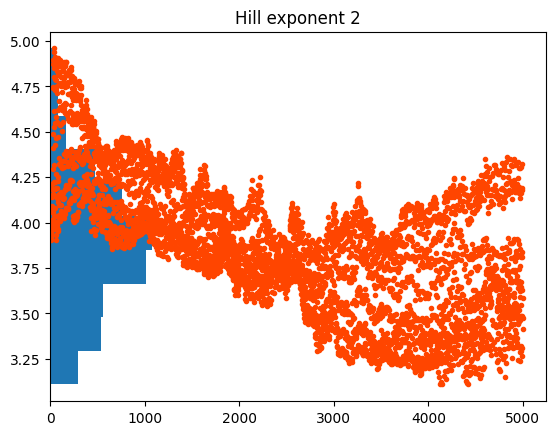

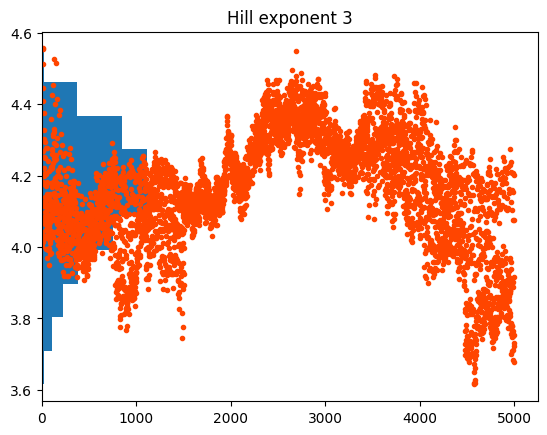

In [26]:
for i in range(0,4):
    plt.plot(nH[:,i],'.',color="orangered")
    plt.hist(nH[:,i],orientation="horizontal")
    plt.title("Hill exponent {}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

## 3. Lineage Information
Its contain the lineage information of the populations at each cycle (24 generations or 48 hrs.).

In [27]:
resultL = pd.read_csv("Result/LineagexCycle"+files+".csv")

resultL

Unnamed: 0  Generation  LTag  LMut      LFit  LOsc  \
0                0        24.0   252     1  0.554388     2   
1                1        24.0   252    28  0.616003     2   
2                2        24.0   252    30  0.598647     2   
3                3        24.0   252    14  0.595177     2   
4                4        24.0   252    28  0.597697     2   
...            ...         ...   ...   ...       ...   ...   
207995      207995      4992.0   746     0  0.524355     2   
207996      207996      4992.0   887     1  0.524355     2   
207997      207997      4992.0   887     1  0.521619     2   
207998      207998      4992.0    34     0  0.546750     2   
207999      207999      4992.0   562     0  0.576753     1   

                                                       Lm  \
0       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
1       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
2       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
3       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
4       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
...                                                   ...   
207995  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
207996  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
207997  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
207998  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
207999  [-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, ...   

                                 Expresion and repression  \
0       [1.19000000e+00 1.20000000e+00 9.00000000e+01 ...   
1       [1.20325426e+00 1.23607202e+00 9.00739456e+01 ...   
2       [1.30011800e+00 1.21974603e+00 9.38928434e+01 ...   
3       [1.19000000e+00 1.20000000e+00 9.28827715e+01 ...   
4       [1.30011800e+00 1.21974603e+00 9.38928434e+01 ...   
...                                                   ...   
207995  [1.32838987e+00 1.14448093e+00 8.83256404e+01 ...   
207996  [1.32838987e+00 1.14448093e+00 8.83256404e+01 ...   
207997  [1.32838987e+00 1.14448093e+00 8.83256404e+01 ...   
207998  [1.18182131e+00 1.26846401e+00 8.78587197e+01 ...   
207999  [8.85681834e-01 1.42186424e+00 8.06127530e+01 ...   

        Constant of light rate  \
0                     0.200000   
1                     0.193342   
2                     0.188987   
3                     0.197300   
4                     0.188987   
...                        ...   
207995                0.172569   
207996                0.172569   
207997                0.172569   
207998                0.205118   
207999                0.209597   

                                    Disociation Constants  \
0       [0.03       1.         0.50085074 5.         0...   
1       [0.02748714 1.06725498 0.56589324 5.70721597 0...   
2       [0.02966861 0.99954845 0.56355703 5.65233031 0...   
3       [0.02988106 1.03557806 0.52182674 5.70542565 0...   
4       [0.02966861 1.01899882 0.56355703 5.65233031 0...   
...                                                   ...   
207995  [0.02570608 0.95883103 0.45734644 4.70902896 0...   
207996  [0.02570608 0.95883103 0.49955663 4.70902896 0...   
207997  [0.02570608 0.97977356 0.45734644 4.70902896 0...   
207998  [0.03007779 0.97919985 0.38329849 5.20694251 0...   
207999  [0.02862745 1.14344676 0.41529025 4.93099748 0...   

                                       Hill exponents  
0       [4.30865006 4.         4.         4.        ]  
1       [4.95102294 3.74035082 5.3467034  4.08013709]  
2       [5.58065144 3.65129979 4.31565494 5.20355165]  
3       [4.71469911 3.60213527 4.12198228 5.0931765 ]  
4       [5.58065144 3.65129979 4.31565494 4.84870238]  
...                                               ...  
207995  [5.20633532 4.96745881 4.8249358  3.7122728 ]  
207996  [5.16753926 4.96745881 4.8249358  3.7122728 ]  
207997  [5.20633532 4.96745881 4.8249358  3.7122728 ]  
207998  [4.46340447 2.85390911 3.27044118 4.53297474]  
207999  [4.34895937 2.97116821 2.937228

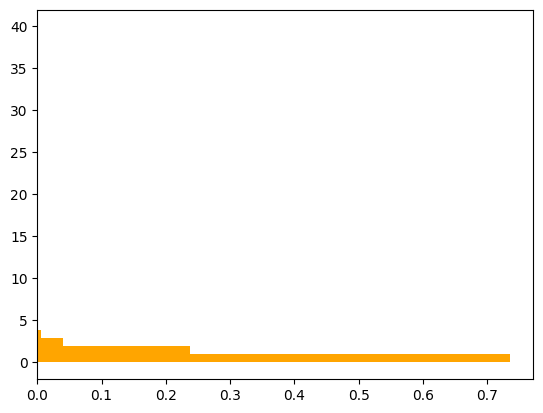

In [28]:
plt.hist(resultL["LMut"],orientation = "horizontal",range=(0,resultL["LMut"].max()+1),
         density=True,color="orange",alpha=1,bins=resultL["LMut"].max()+2,rwidth=1)
plt.show()

- Graphics the lineage mutation distribution for each cycle.

/home/ehernandez/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


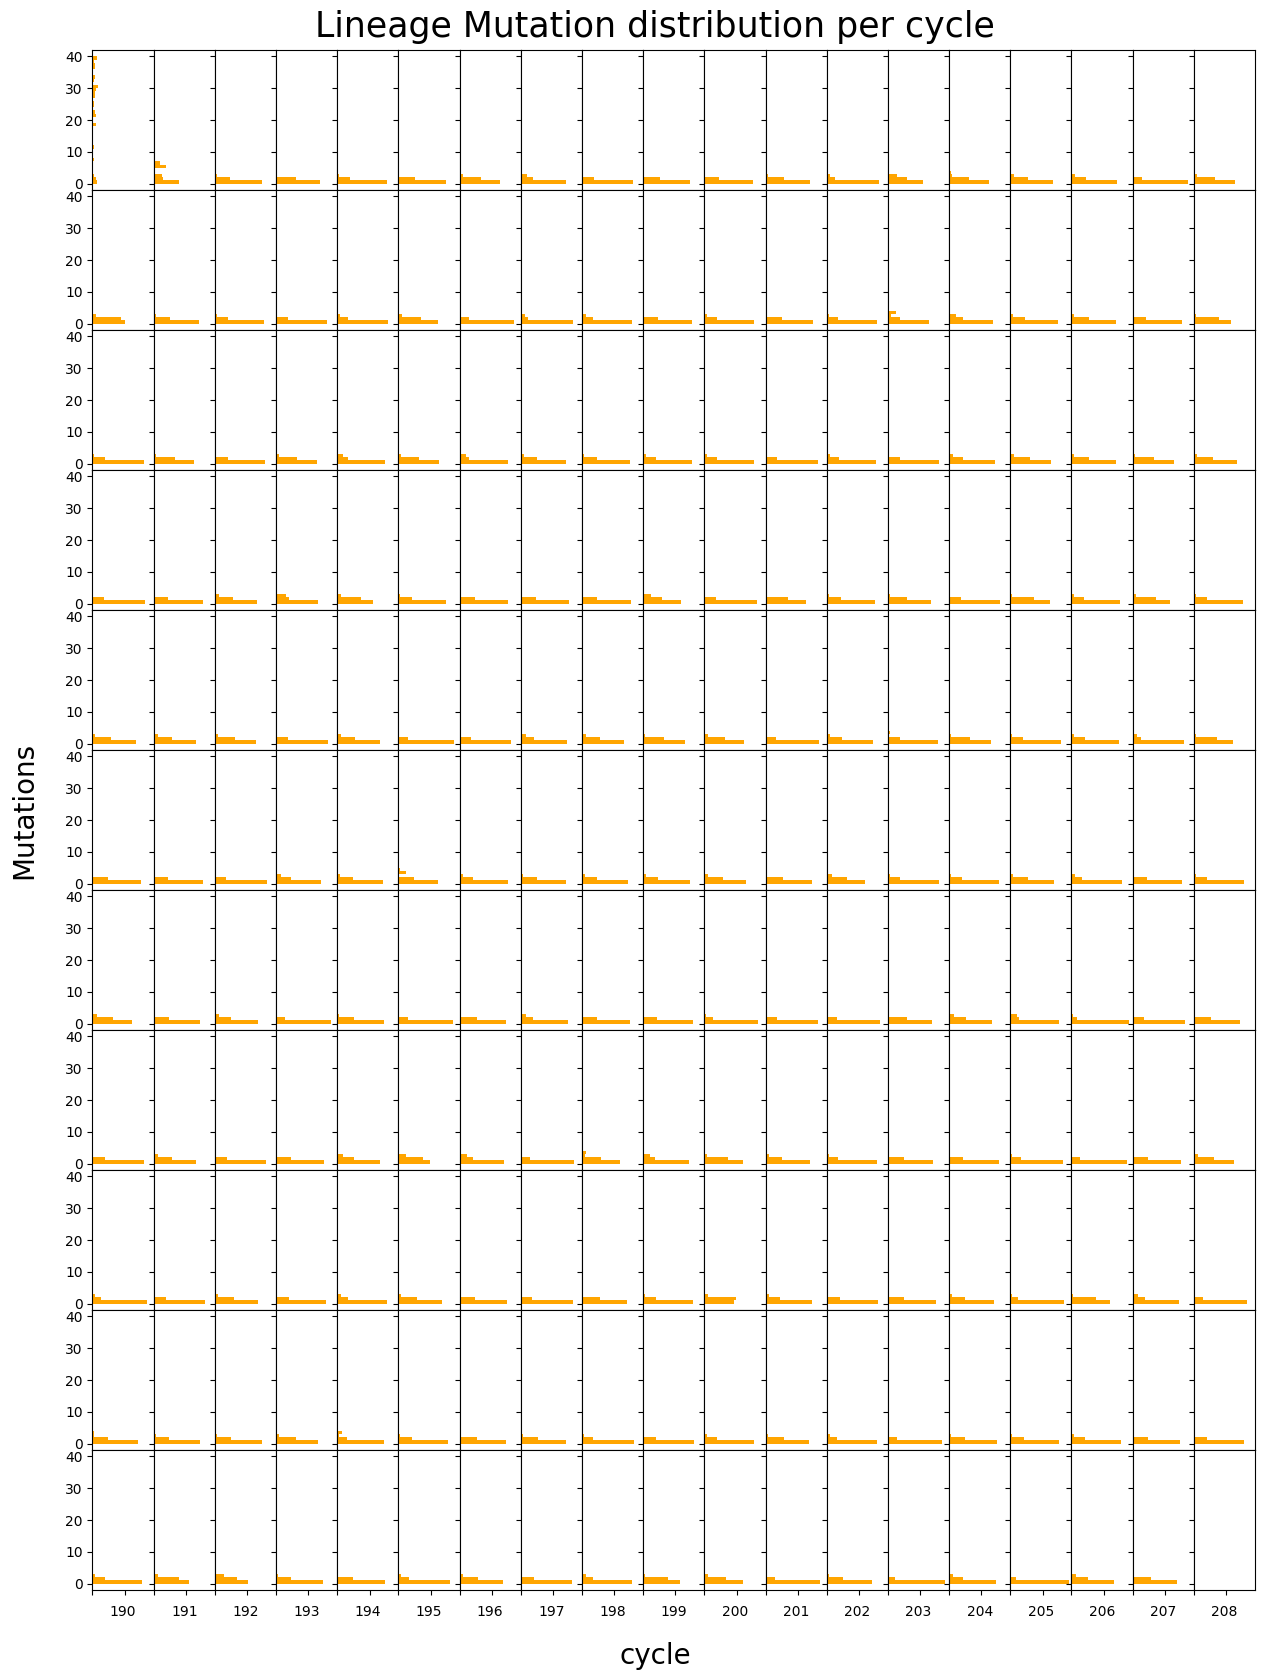

In [29]:
fig,ax =plt.subplots(11,19,sharey=True,sharex=True,figsize=(15,20))
for i in range(int(resultL["Generation"].max()/24) + 1):
    ax[i//19,i%19].hist(resultL["LMut"][i*1000:(i+1)*1000],
                        orientation = "horizontal",range=(0,resultL["LMut"].max()+1),
                        density=True,color="orange",alpha=1,bins=resultL["LMut"].max()+1)
    ax[i//19,i%19].set_xlabel(i)
    ax[i//19,i%19].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage Mutation distribution per cycle",position=(.5,.9),fontsize=25)
fig.supxlabel("cycle",position=(0.5,0.07),fontsize=20)
fig.supylabel("Mutations",position=(0.07,.5),fontsize=20)
plt.savefig("Result/Lineage_Mutations"+files+".jpg")
plt.show()

- Fitness lineage distribution like a violinplot.

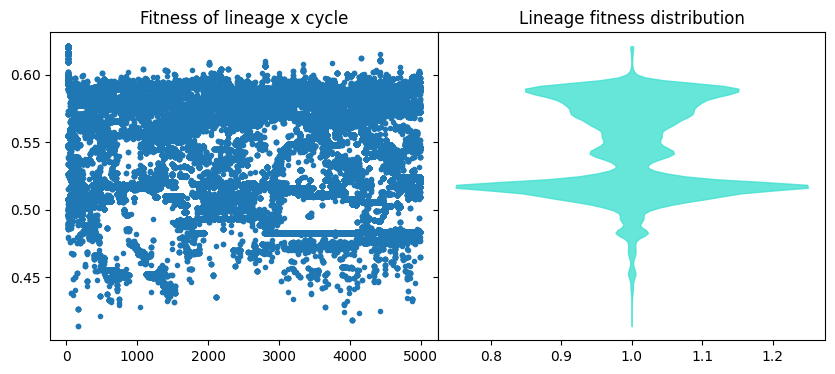

In [31]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LFit"],".")
ax[0].set_title("Fitness of lineage x cycle")
vp=ax[1].violinplot(resultL["LFit"],showextrema=False)
for body in vp['bodies']:
    body.set_color("turquoise")
    body.set_alpha(0.8)
plt.title("Lineage fitness distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Lineage_Fitness"+files+".jpg")
plt.show()

- Distribution of the parents lineage of each cycle.

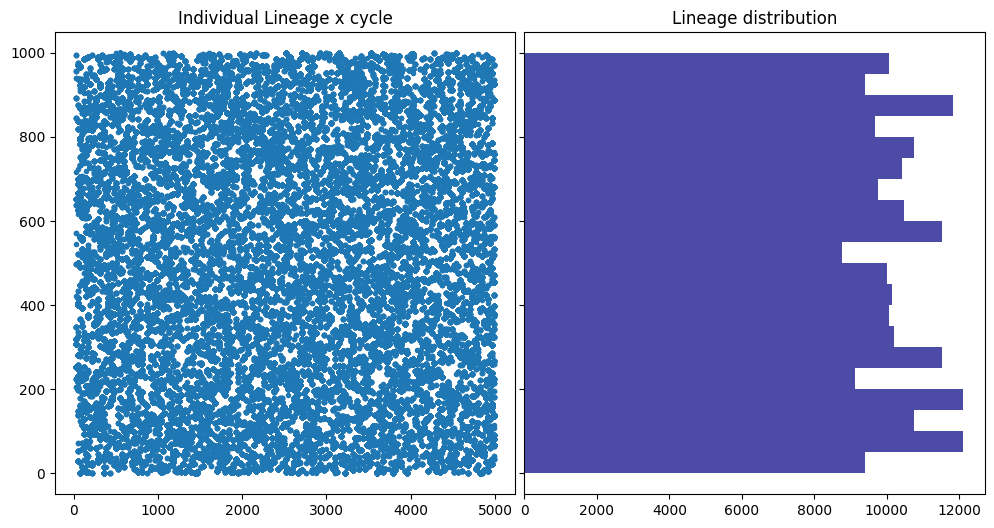

In [32]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
ax[0].plot(resultL["Generation"],resultL["LTag"],".")
ax[0].set_title("Individual Lineage x cycle")
ax[1].hist(resultL["LTag"],orientation="horizontal", density = False,
           color="navy",alpha=0.7,bins=20)
#ax[1].set_xticks([0,0.0005,0.001,0.0015,0.002],labels=["0","0.0005","0.001","0.0015","0.002"])
plt.title("Lineage distribution")
plt.subplots_adjust(wspace=0.02)
plt.savefig("Result/IndividualTag"+files+".jpg")
plt.show()

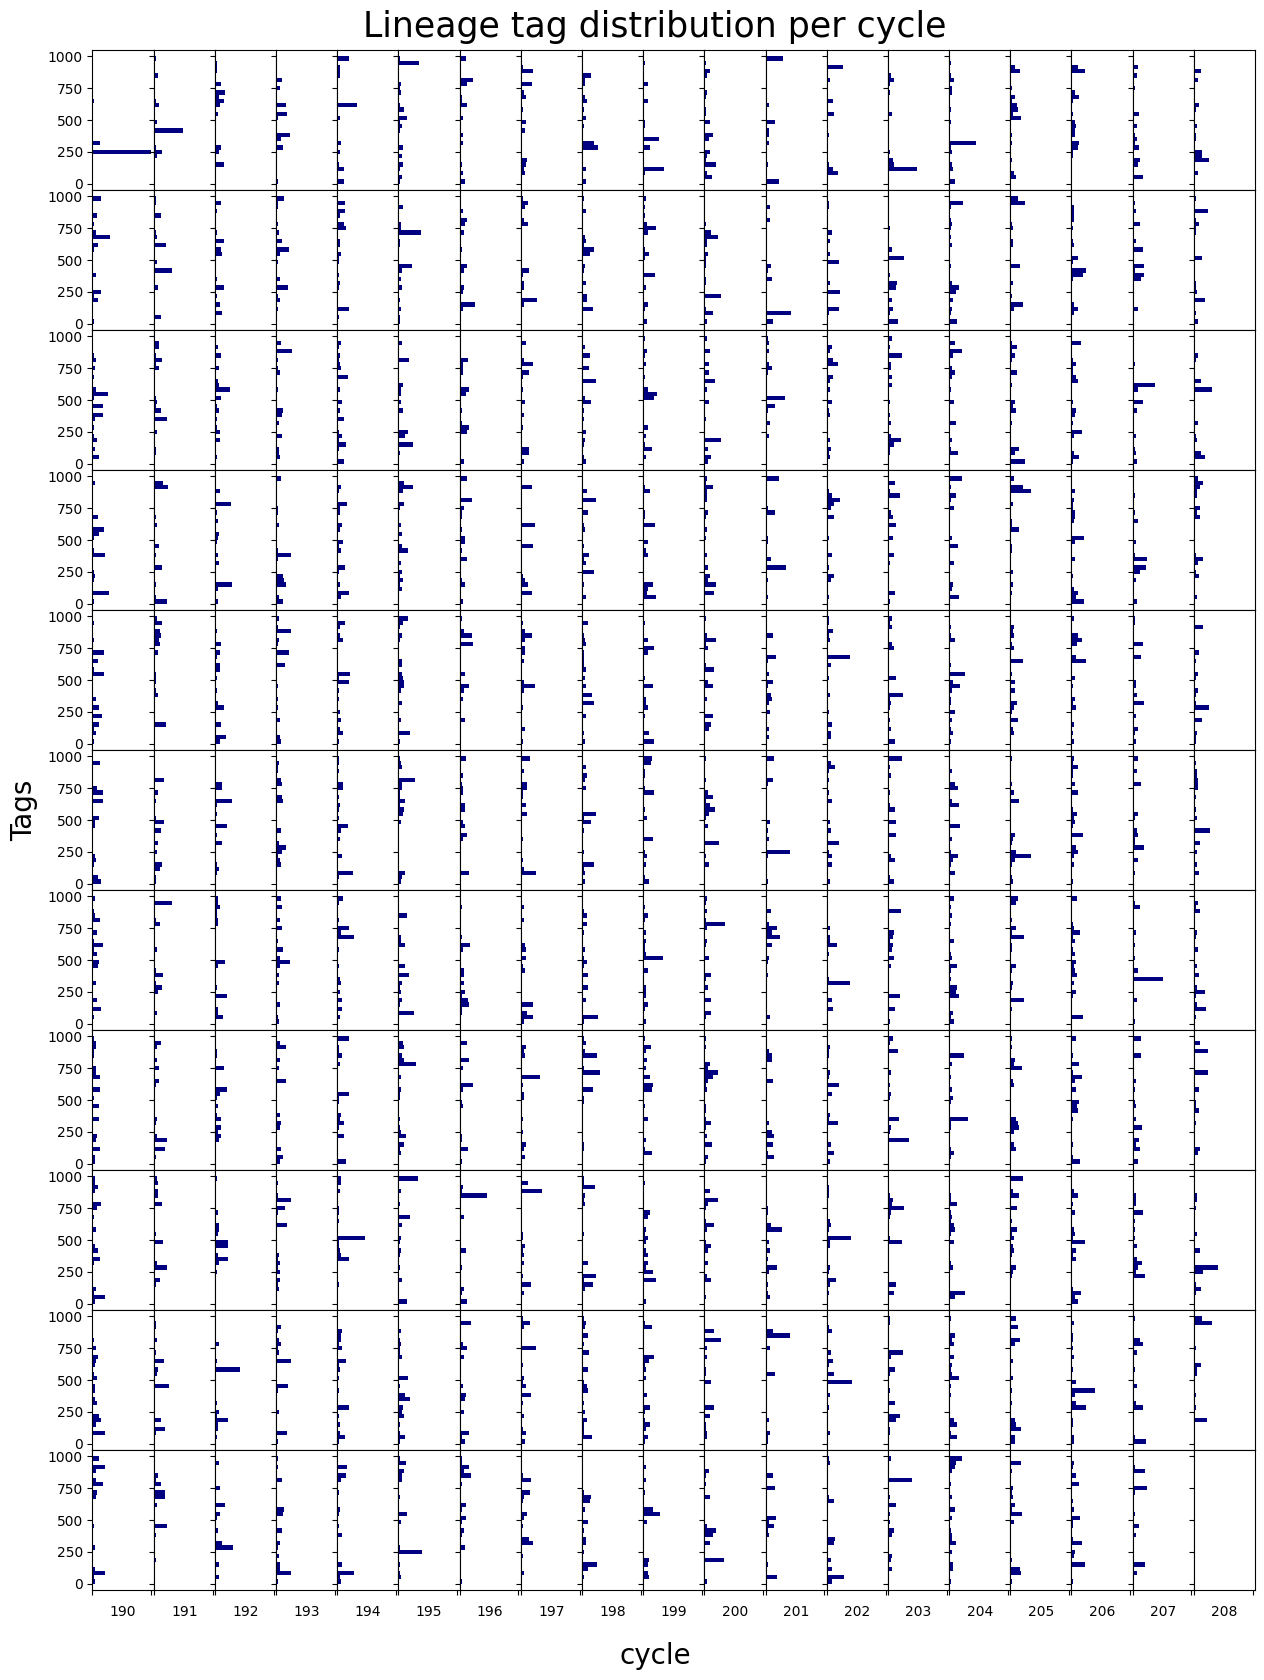

In [33]:
fig,ax =plt.subplots(11,19,sharey=True,sharex=True,figsize=(15,20))
for i in range(int(resultL["Generation"].max()/24) + 1):
    ax[i//19,i%19].hist(resultL["LTag"][i*1000:(i+1)*1000],
                        orientation = "horizontal",range=(0,1000),
                        density=True,color="navy",alpha=1,bins=30)
    ax[i//19,i%19].set_xlabel(i)
    ax[i//19,i%19].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage tag distribution per cycle",position=(.5,.9),fontsize=25)
fig.supxlabel("cycle",position=(0.5,0.07),fontsize=20)
fig.supylabel("Tags",position=(0.07,.5),fontsize=20)
plt.show()

- Parameters distributions of the lineages through the cycles.

In [35]:
a=len(resultL["Expresion and repression"])
ER = [[0]*23]*a
for i in range(a):
    ER[i] = np.array(np.mat(resultL["Expresion and repression"][i]))[0]
ER = np.array(ER)
    
Dk = [[0]*7]*a
for i in range(a):
    Dk[i] = np.array(np.mat(resultL["Disociation Constants"][i]))[0]
Dk = np.array(Dk)

Hexp = [[0]*4]*a
for i in range(a):
    Hexp[i] = np.array(np.mat(resultL["Hill exponents"][i]))[0]
Hexp = np.array(Hexp)

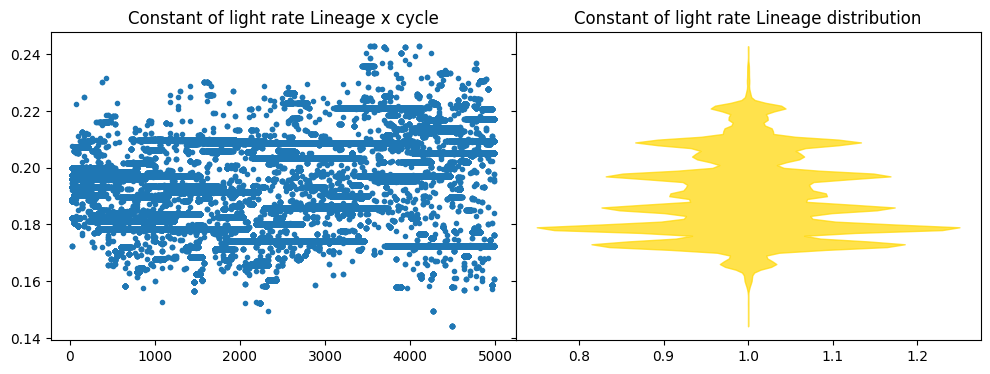

In [36]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultL["Generation"],resultL["Constant of light rate"],".")
ax[0].set_title("Constant of light rate Lineage x cycle")
vp=ax[1].violinplot(resultL["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Lineage distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Light_Lin"+files+".jpg")
plt.show()

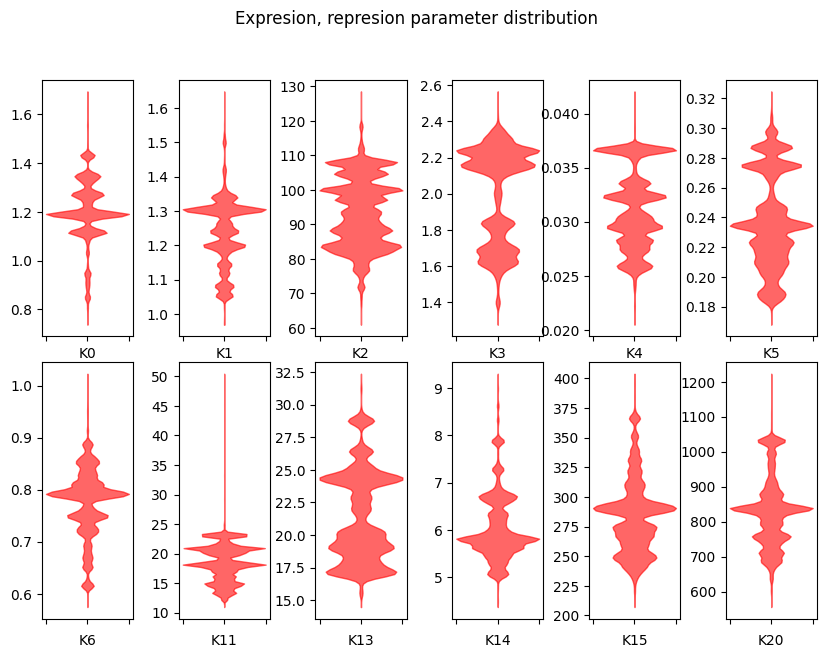

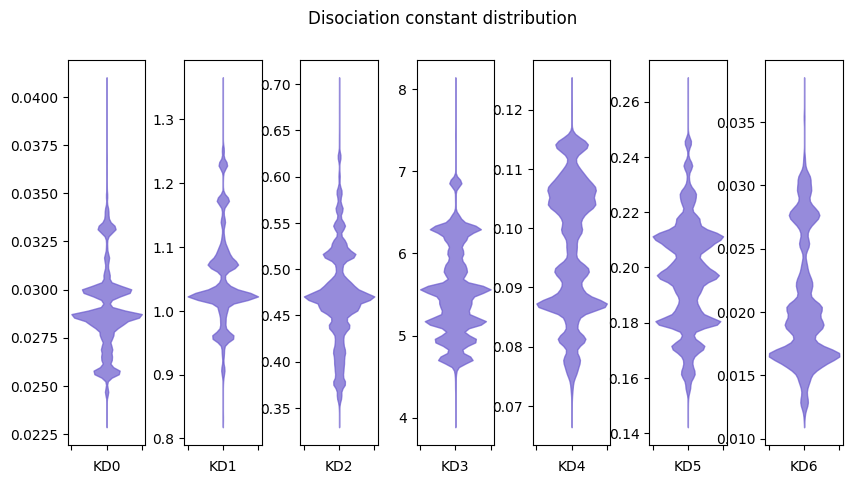

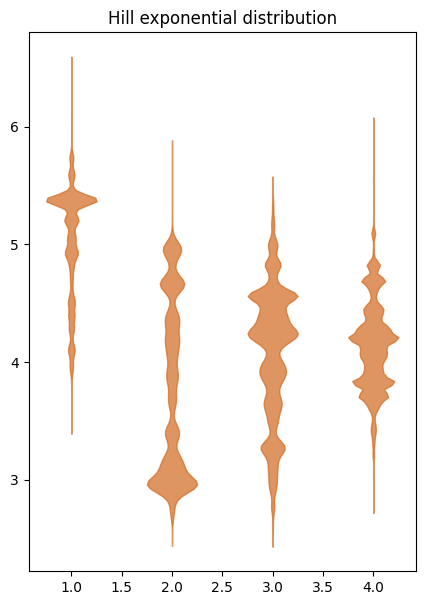

In [37]:
fig,ax=plt.subplots(2,6,figsize=(10,7),sharex=True)
for i,j in enumerate([0,1,2,3,4,5,6,11,13,14,15,20]):
    vp=ax[i//6,i%6].violinplot(ER[:,j],showextrema=False)
    vp['bodies'][0].set_color("red")
    vp['bodies'][0].set_alpha(0.6)
    ax[i//6,i%6].set_xticklabels("")
    ax[i//6,i%6].set_xlabel("K"+str(j))
plt.subplots_adjust(wspace=0.5,hspace=0.1)
fig.suptitle("Expresion, represion parameter distribution")
plt.savefig("Result/k_Lin"+files+".jpg")
plt.show()

fig,ax=plt.subplots(1,7,figsize=(10,5),sharex=True)
for i in range(7):
    vp=ax[i].violinplot(Dk[:,i],showextrema=False)
    vp['bodies'][0].set_color("slateblue")
    vp['bodies'][0].set_alpha(0.7)
    ax[i].set_xticklabels("")
    ax[i].set_xlabel("KD"+str(i))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Disociation constant distribution")
plt.savefig("Result/KM_Lin"+files+".jpg")
plt.show()

fig,ax=plt.subplots(1,figsize=(5,7))
vp=ax.violinplot(Hexp,showextrema=False)
for body in vp['bodies']:
    body.set_color("chocolate")
    body.set_alpha(0.7)
plt.title("Hill exponential distribution")
plt.savefig("Result/Hill_exp_Lin"+files+".jpg")
plt.show()

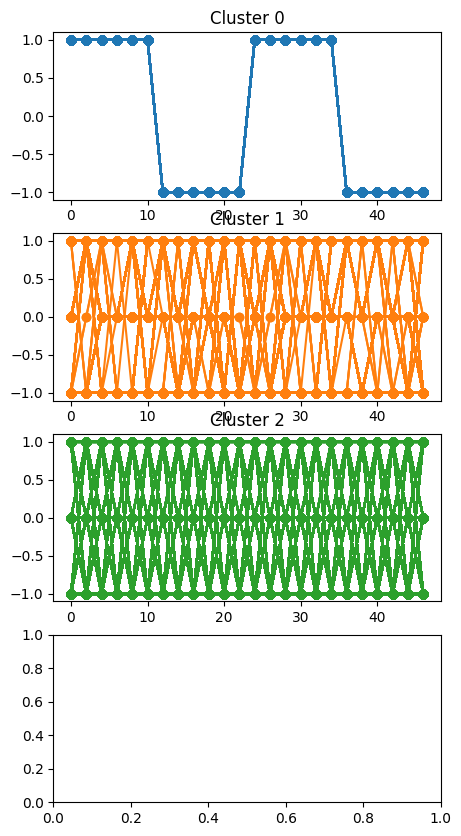

In [38]:
a=len(resultL["Lm"])
X=np.empty((a,24))
for i in range(a):
    X[i] = np.array(np.mat(resultL["Lm"][i].replace("nan","0")))[0]
X=np.where(np.isfinite(X),X,0)

fig, ax = plt.subplots(4, 1, figsize=(5, 10))
y=resultL["LOsc"]
for i in np.unique(y):
    ax[i].plot(
        np.arange(0,48,2),
        X[y == i].T, 
        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o'
    )
    ax[i].set_title('Cluster {}'.format(i))
plt.show()

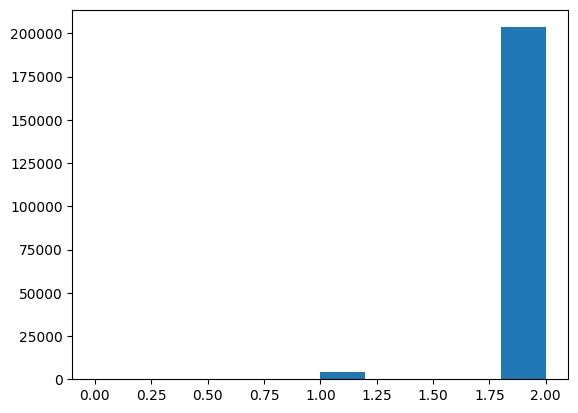

In [39]:
plt.hist(resultL["LOsc"],range=(0,2))
plt.show()